<a href="https://colab.research.google.com/github/MathBSilva/Projeto-393/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

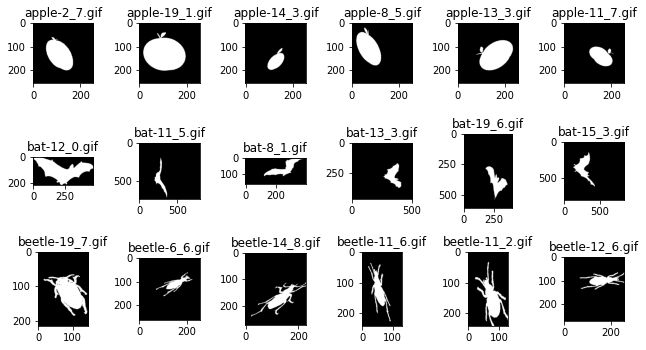

In [377]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

np.random.seed(393)

# 3 classes - Conjunto completo
ds_path = '/content/drive/MyDrive/mpeg7_4classes_aug_x8_work/Train'

# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(ds_path)

# Lista com as imagens no dataset
image_list = []
# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = plt.imread(os.path.join(ds_path, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(3):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]
fig, ax  = plt.subplots(3, 6, figsize=(9, 5))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, vmin=0, vmax=255)
    ax[i//6, i%6].set_title(str(filename))
    ### ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

Imagem 0 - classe bone


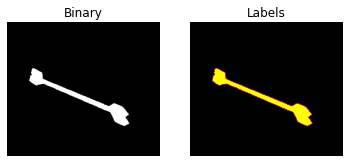

Imagem 1 - classe bone


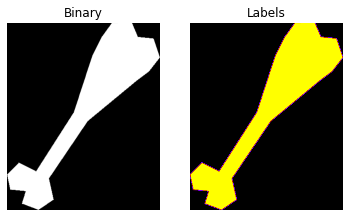

Imagem 2 - classe bone


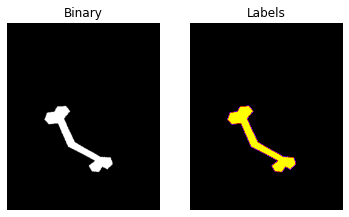

Imagem 3 - classe bone


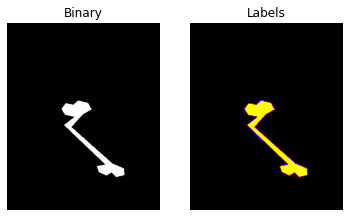

Imagem 4 - classe bone


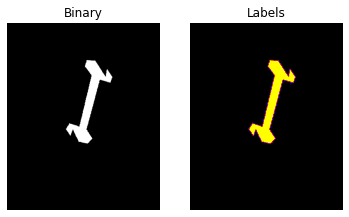

Imagem 5 - classe bone


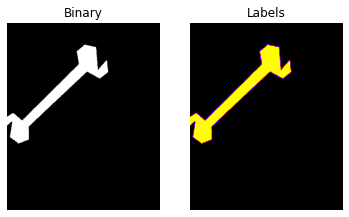

Imagem 6 - classe bone


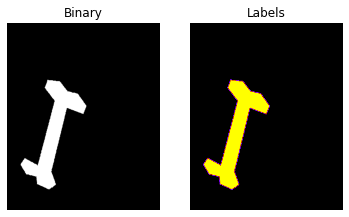

Imagem 7 - classe bone


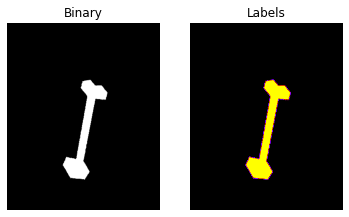

Imagem 8 - classe bone


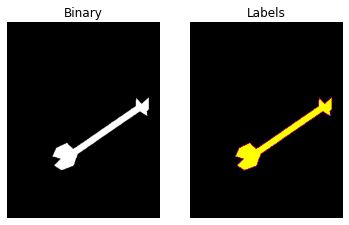

Imagem 9 - classe bone


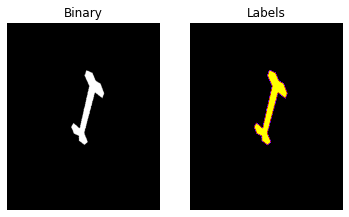

Imagem 10 - classe bone


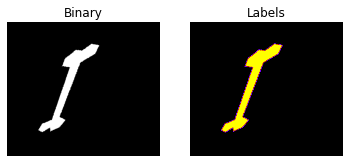

Imagem 11 - classe bone


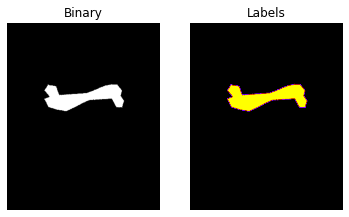

Imagem 12 - classe bone


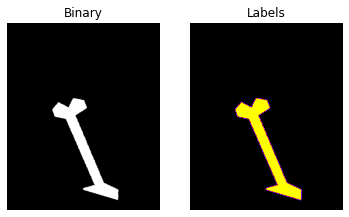

Imagem 13 - classe bone


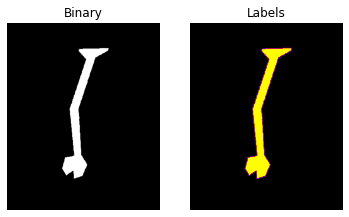

Imagem 14 - classe bone


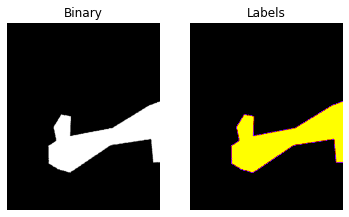

Imagem 15 - classe bone


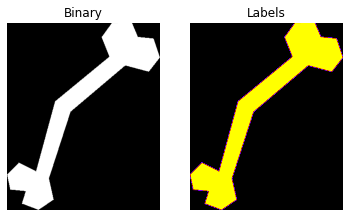

Imagem 16 - classe bone


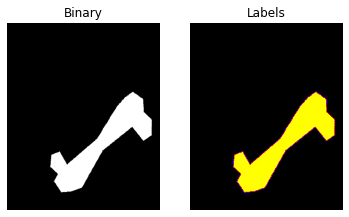

Imagem 17 - classe bone


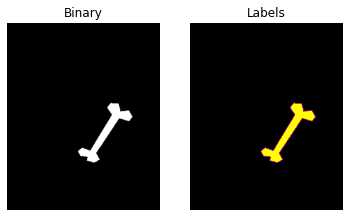

Imagem 18 - classe bone


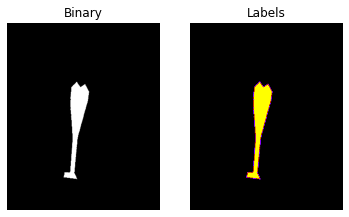

Imagem 19 - classe bone


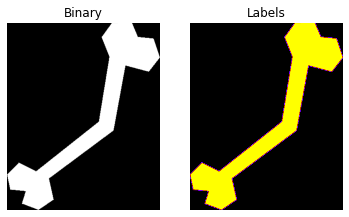

Imagem 20 - classe bone


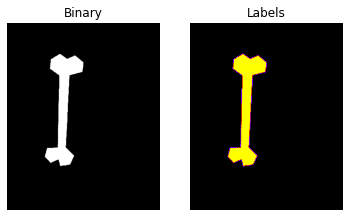

Imagem 21 - classe bone


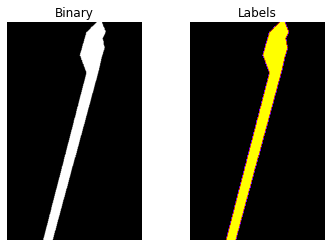

Imagem 22 - classe bone


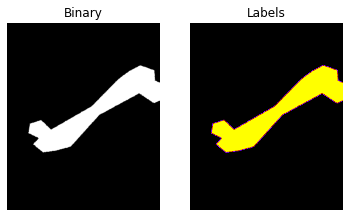

Imagem 23 - classe bone


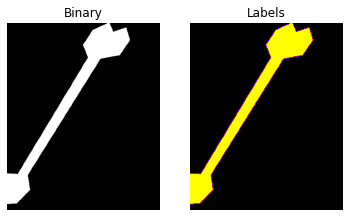

Imagem 24 - classe bone


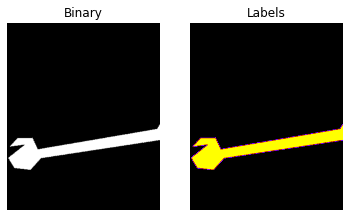

Imagem 25 - classe bone


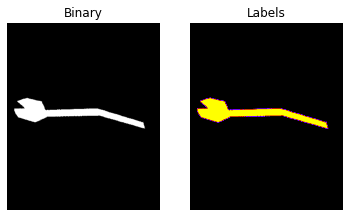

Imagem 26 - classe bone


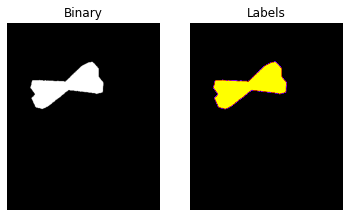

Imagem 27 - classe bone


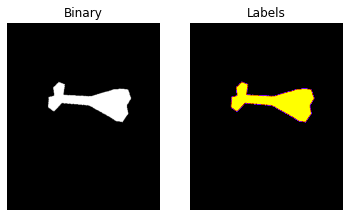

Imagem 28 - classe bone


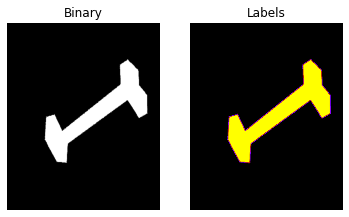

Imagem 29 - classe bone


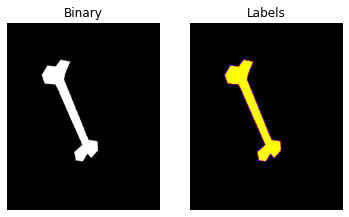

Imagem 30 - classe bone


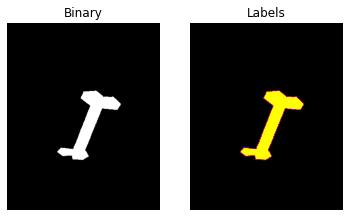

Imagem 31 - classe bone


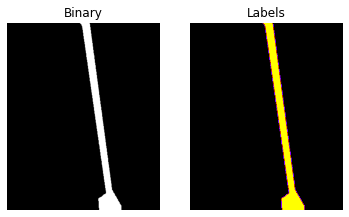

Imagem 32 - classe bone


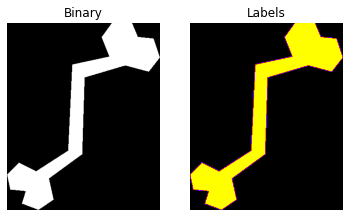

Imagem 33 - classe bone


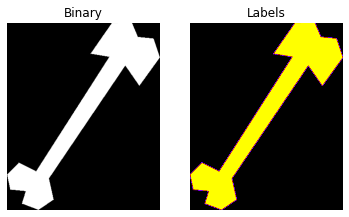

Imagem 34 - classe bone


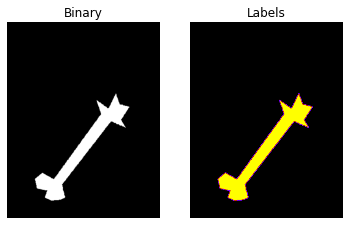

Imagem 35 - classe bone


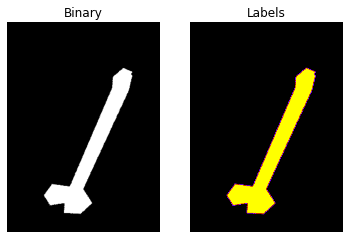

Imagem 36 - classe bone


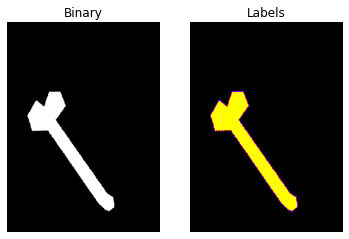

Imagem 37 - classe bone


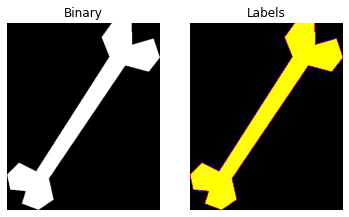

Imagem 38 - classe bone


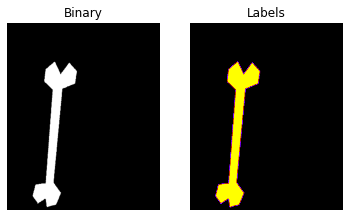

Imagem 39 - classe bone


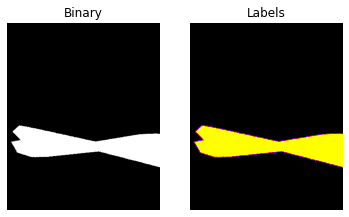

Imagem 40 - classe bone


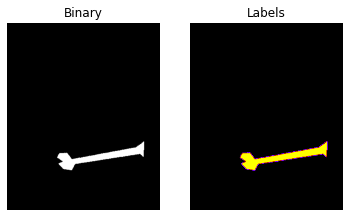

Imagem 41 - classe bone


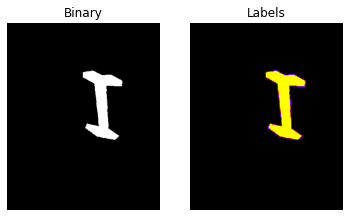

Imagem 42 - classe bone


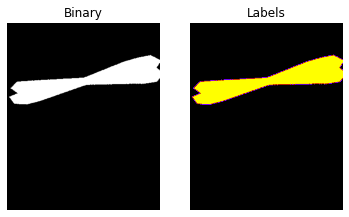

Imagem 43 - classe bone


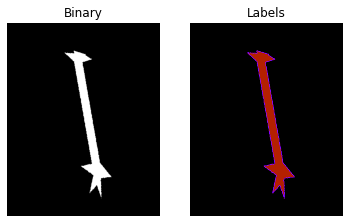

Imagem 44 - classe bone


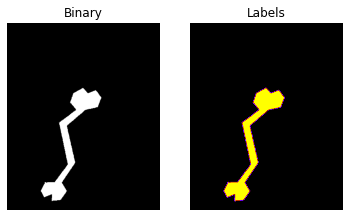

Imagem 45 - classe bone


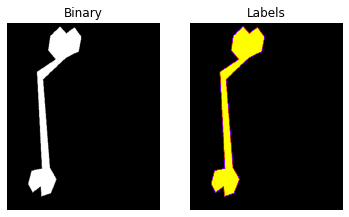

Imagem 46 - classe bone


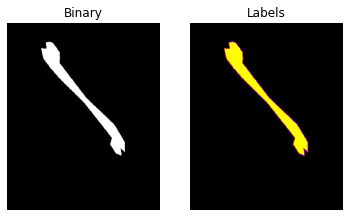

Imagem 47 - classe bone


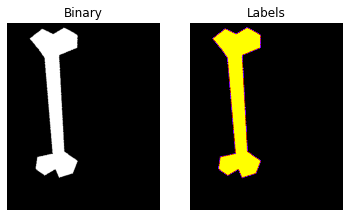

Imagem 48 - classe bone


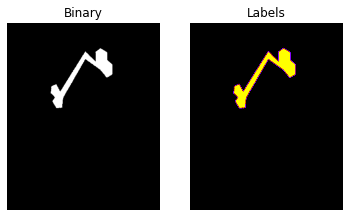

Imagem 49 - classe bone


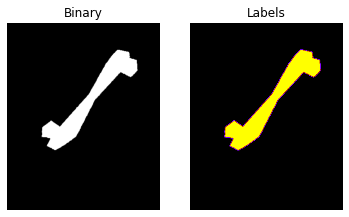

Imagem 50 - classe bone


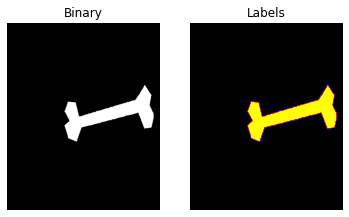

Imagem 51 - classe bone


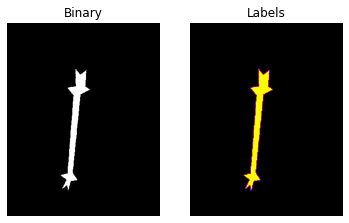

Imagem 52 - classe bone


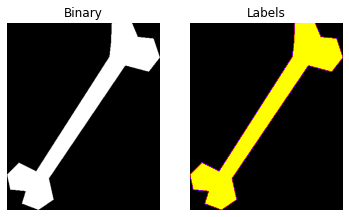

Imagem 53 - classe bone


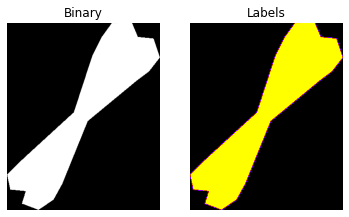

Imagem 54 - classe bone


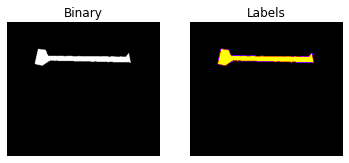

Imagem 55 - classe bone


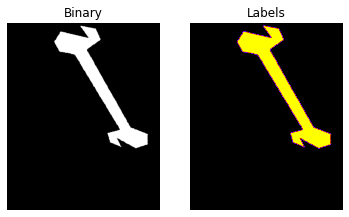

Imagem 56 - classe bone


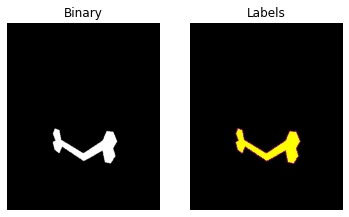

Imagem 57 - classe bone


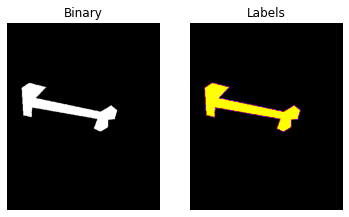

Imagem 58 - classe bone


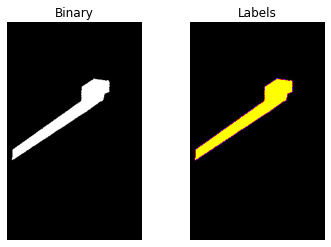

Imagem 59 - classe bone


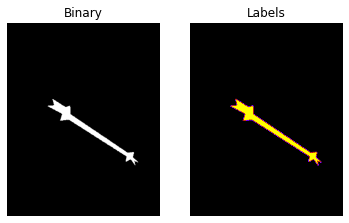

Imagem 60 - classe bone


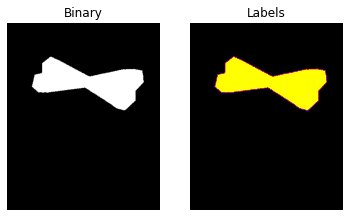

Imagem 61 - classe bone


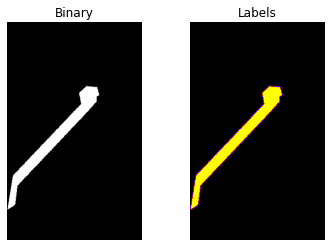

Imagem 62 - classe bone


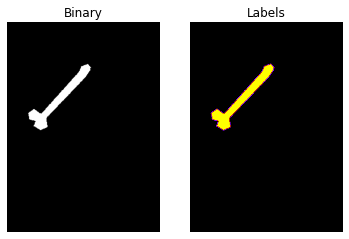

Imagem 63 - classe bone


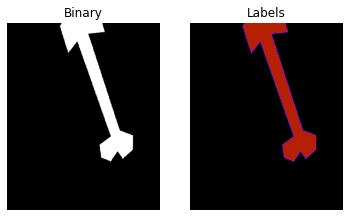

Imagem 64 - classe bone


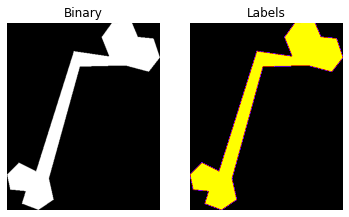

Imagem 65 - classe bone


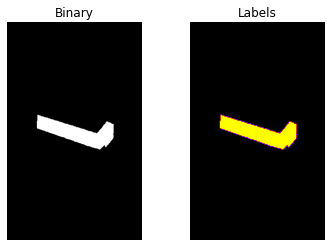

Imagem 66 - classe bone


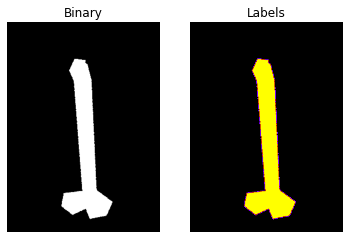

Imagem 67 - classe bone


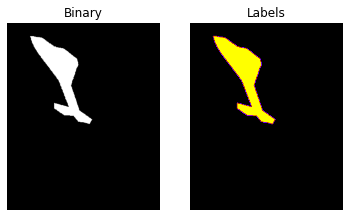

Imagem 68 - classe bone


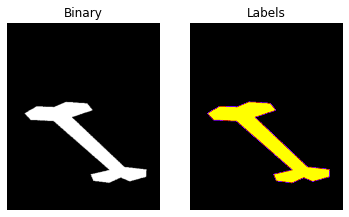

Imagem 69 - classe bone


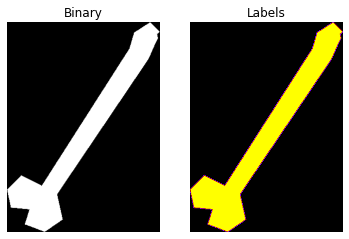

Imagem 70 - classe bone


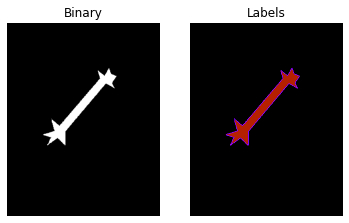

Imagem 71 - classe bone


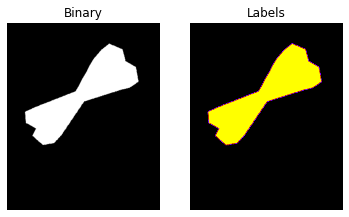

Imagem 72 - classe bone


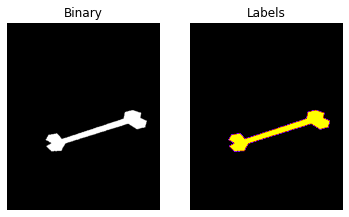

Imagem 73 - classe bone


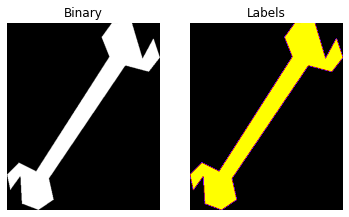

Imagem 74 - classe bone


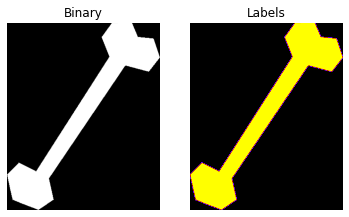

Imagem 75 - classe bone


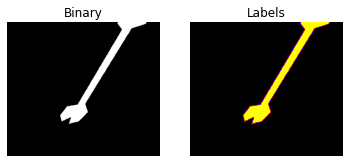

Imagem 76 - classe bone


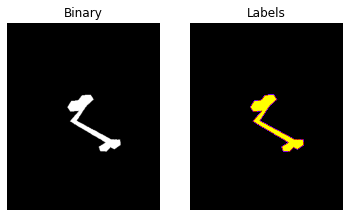

Imagem 77 - classe bone


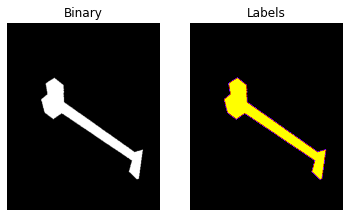

Imagem 78 - classe bone


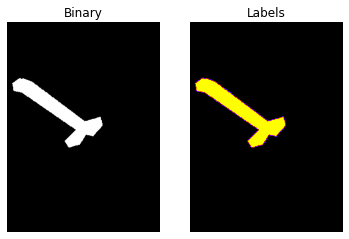

Imagem 79 - classe bone


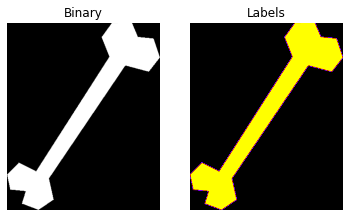

Imagem 80 - classe bone


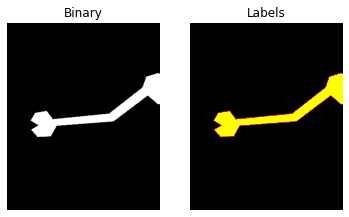

Imagem 81 - classe bone


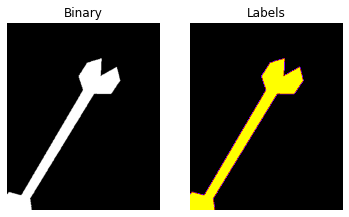

Imagem 82 - classe bone


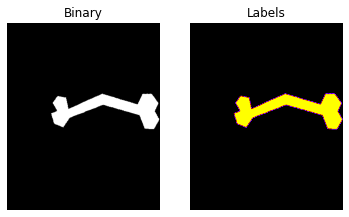

Imagem 83 - classe bone


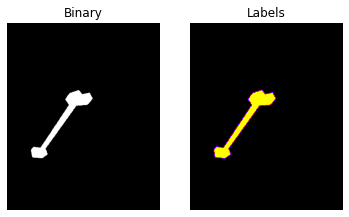

Imagem 84 - classe bone


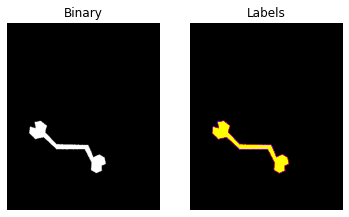

Imagem 85 - classe bone


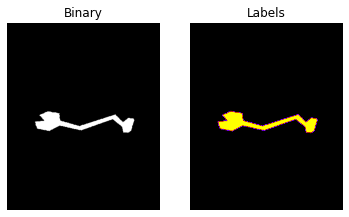

Imagem 86 - classe bone


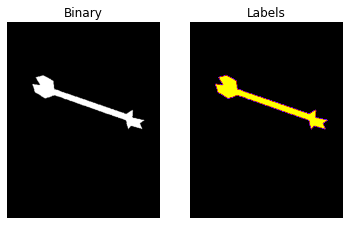

Imagem 87 - classe bone


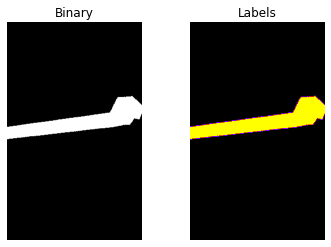

Imagem 88 - classe bone


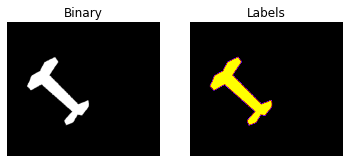

Imagem 89 - classe bone


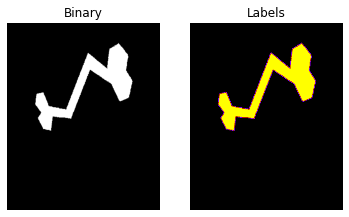

Imagem 90 - classe bone


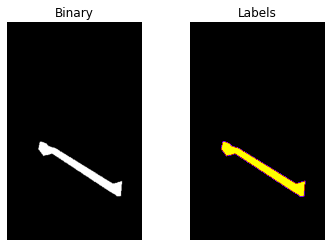

Imagem 91 - classe bone


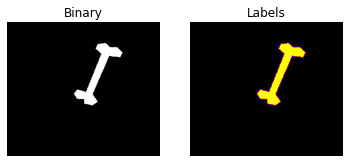

Imagem 92 - classe bone


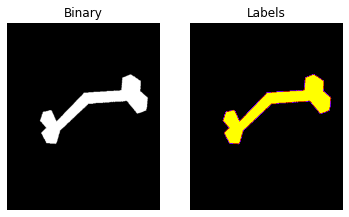

Imagem 93 - classe bone


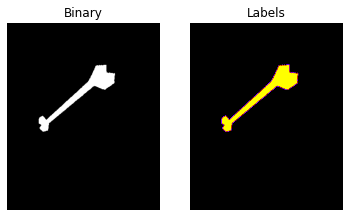

Imagem 94 - classe bone


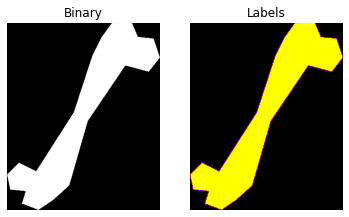

Imagem 95 - classe bone


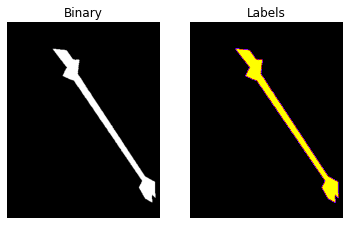

Imagem 96 - classe bone


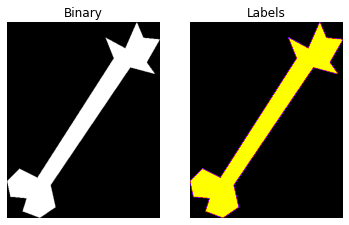

Imagem 97 - classe bone


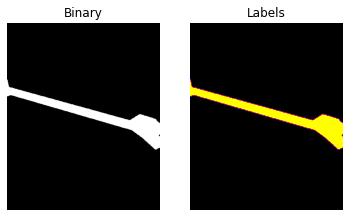

Imagem 98 - classe bone


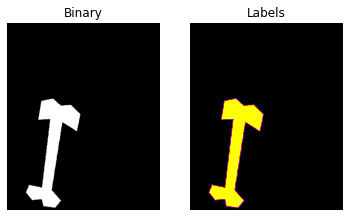

Imagem 99 - classe bone


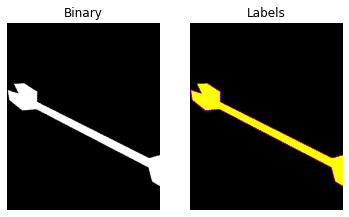

Imagem 100 - classe bone


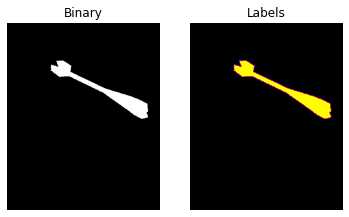

Imagem 101 - classe bone


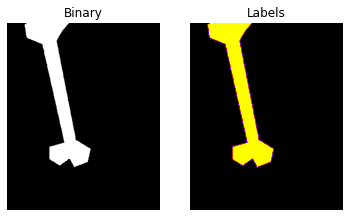

Imagem 102 - classe bone


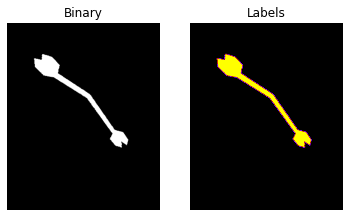

Imagem 103 - classe bone


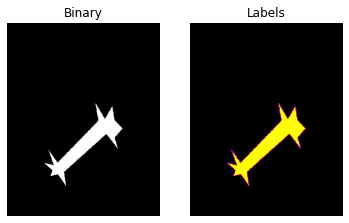

Imagem 104 - classe bone


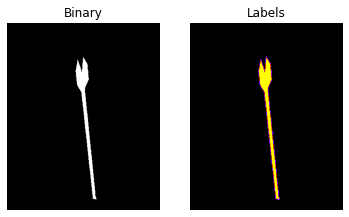

Imagem 105 - classe bone


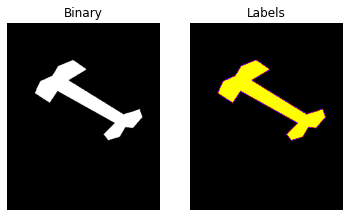

Imagem 106 - classe bone


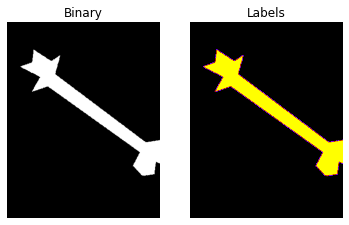

Imagem 107 - classe bone


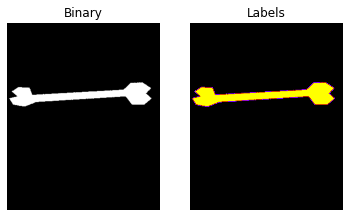

Imagem 108 - classe bone


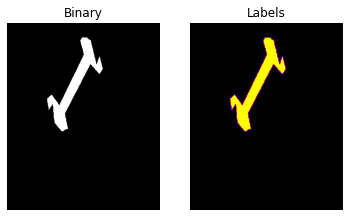

Imagem 109 - classe bone


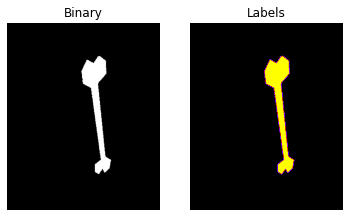

Imagem 110 - classe bone


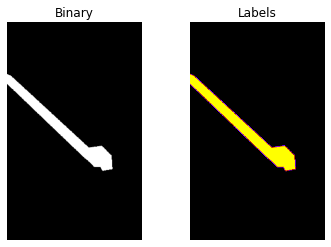

Imagem 111 - classe bone


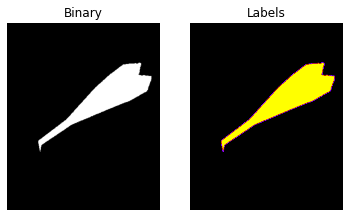

Imagem 112 - classe bone


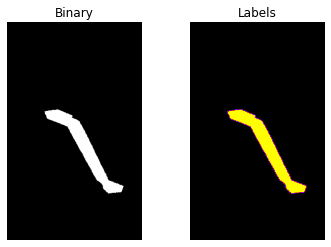

Imagem 113 - classe bone


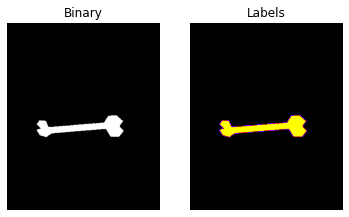

Imagem 114 - classe bone


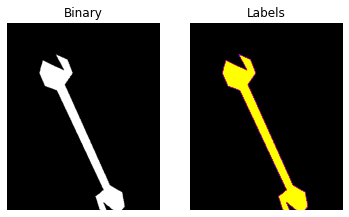

Imagem 115 - classe bone


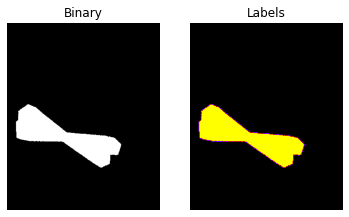

Imagem 116 - classe bone


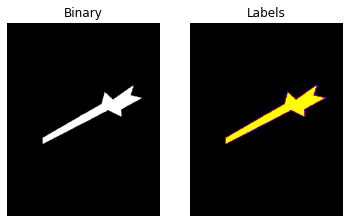

Imagem 117 - classe bone


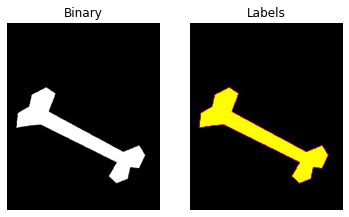

Imagem 118 - classe bone


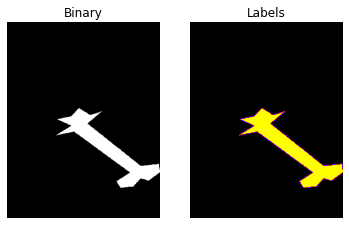

Imagem 119 - classe bone


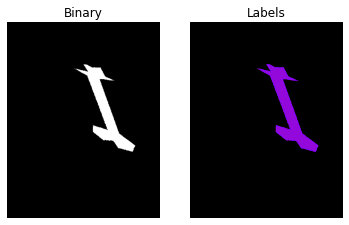

Imagem 120 - classe bone


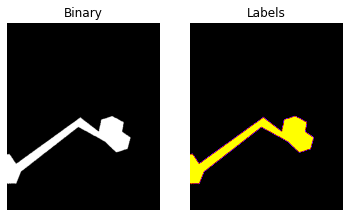

Imagem 121 - classe bone


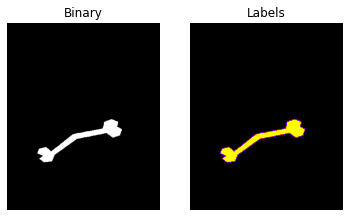

Imagem 122 - classe bone


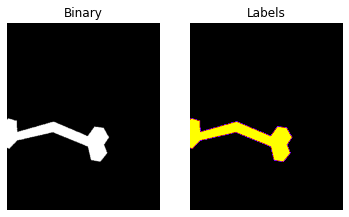

Imagem 123 - classe bone


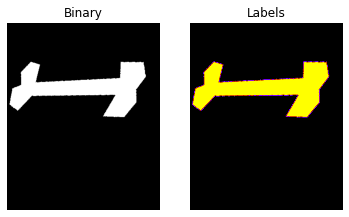

Imagem 124 - classe bone


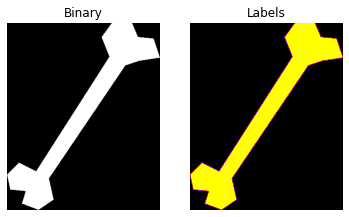

Imagem 125 - classe bone


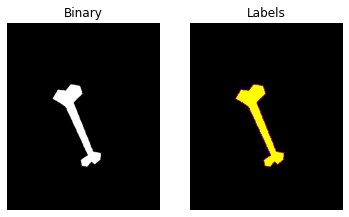

Imagem 126 - classe beetle


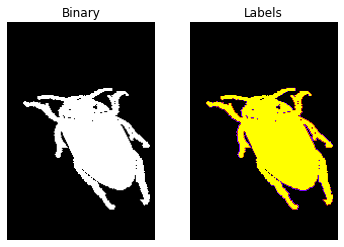

Imagem 127 - classe beetle


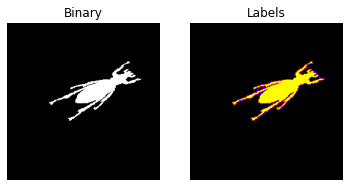

Imagem 128 - classe beetle


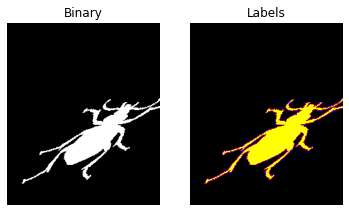

Imagem 129 - classe beetle


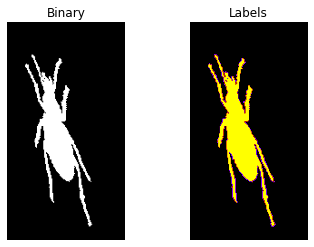

Imagem 130 - classe beetle


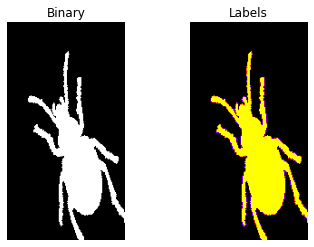

Imagem 131 - classe beetle


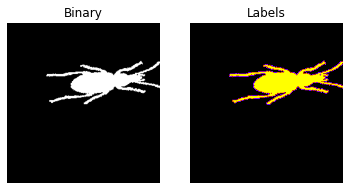

Imagem 132 - classe beetle


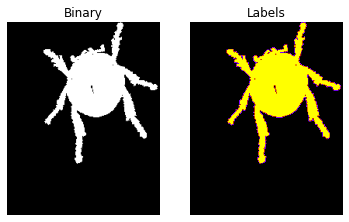

Imagem 133 - classe beetle


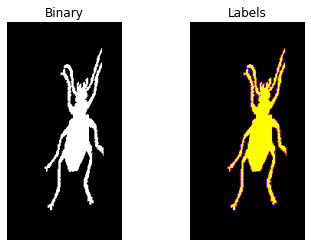

Imagem 134 - classe beetle


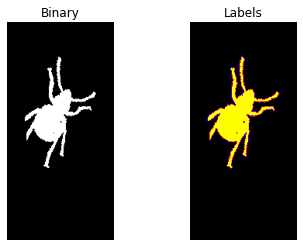

Imagem 135 - classe beetle


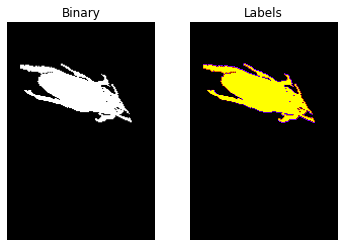

Imagem 136 - classe beetle


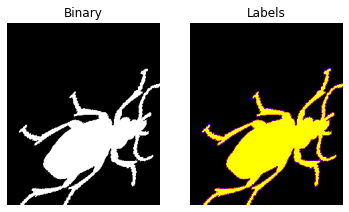

Imagem 137 - classe beetle


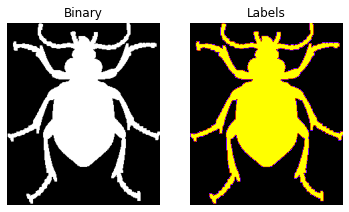

Imagem 138 - classe beetle


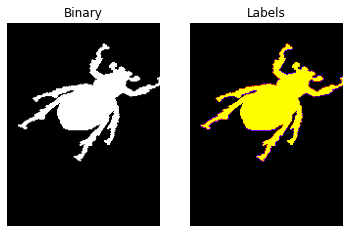

Imagem 139 - classe beetle


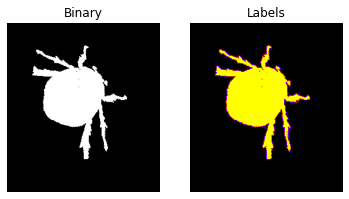

Imagem 140 - classe beetle


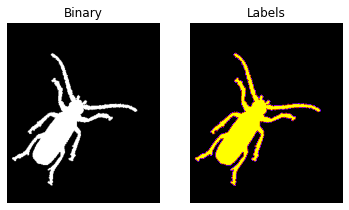

Imagem 141 - classe beetle


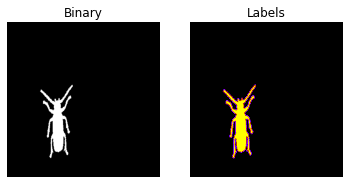

Imagem 142 - classe beetle


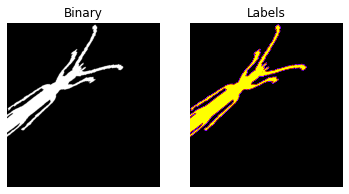

Imagem 143 - classe beetle


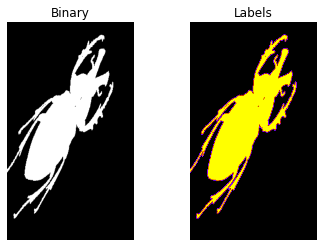

Imagem 144 - classe beetle


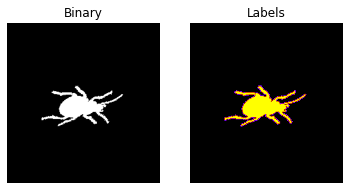

Imagem 145 - classe beetle


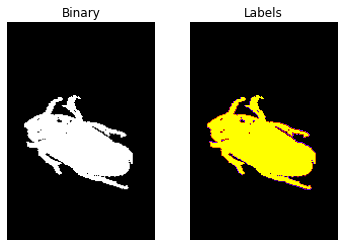

Imagem 146 - classe beetle


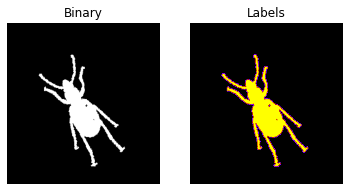

Imagem 147 - classe beetle


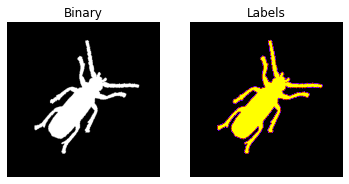

Imagem 148 - classe beetle


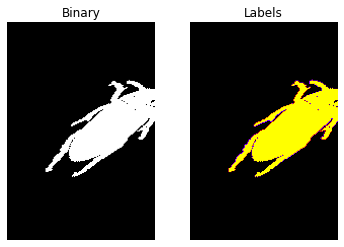

Imagem 149 - classe beetle


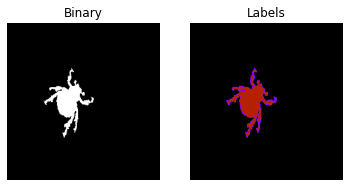

Imagem 150 - classe beetle


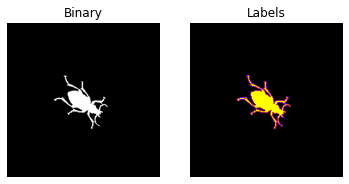

Imagem 151 - classe beetle


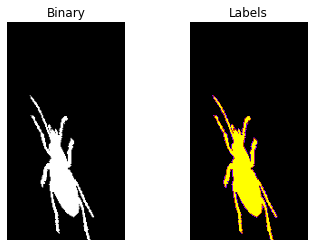

Imagem 152 - classe beetle


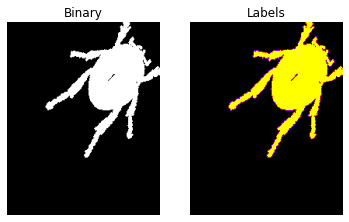

Imagem 153 - classe beetle


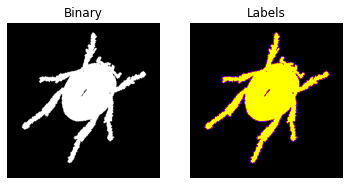

Imagem 154 - classe beetle


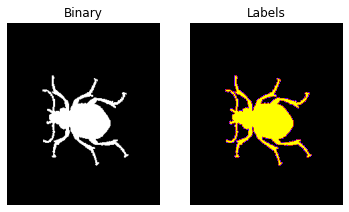

Imagem 155 - classe beetle


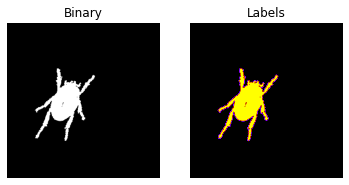

Imagem 156 - classe beetle


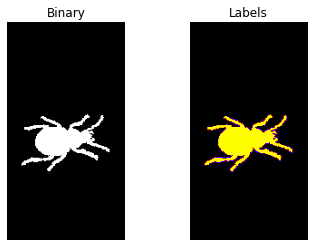

Imagem 157 - classe beetle


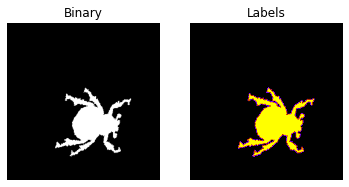

Imagem 158 - classe beetle


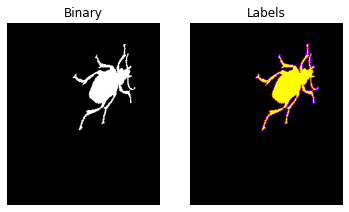

Imagem 159 - classe beetle


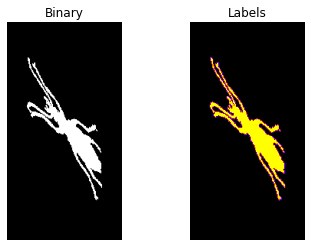

Imagem 160 - classe beetle


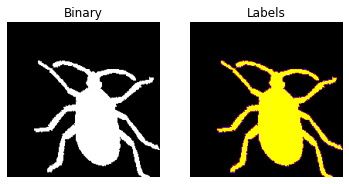

Imagem 161 - classe beetle


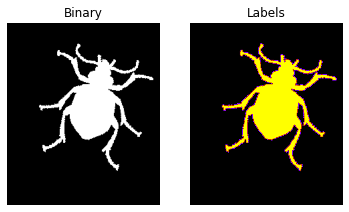

Imagem 162 - classe beetle


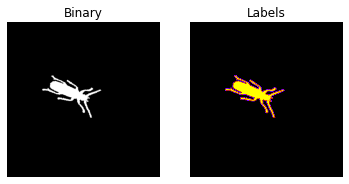

Imagem 163 - classe beetle


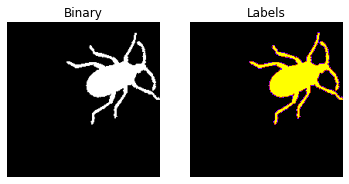

Imagem 164 - classe beetle


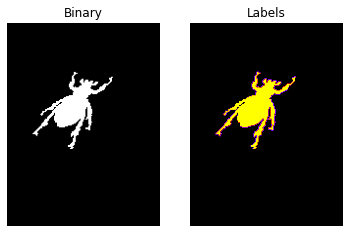

Imagem 165 - classe beetle


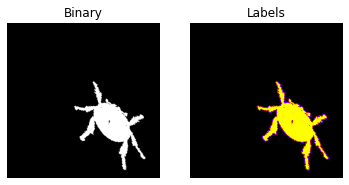

Imagem 166 - classe beetle


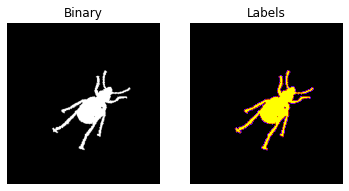

Imagem 167 - classe beetle


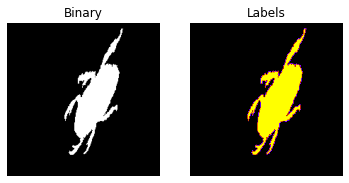

Imagem 168 - classe beetle


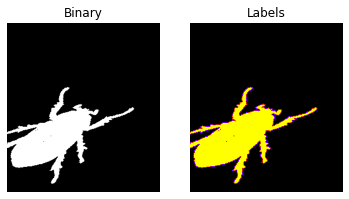

Imagem 169 - classe beetle


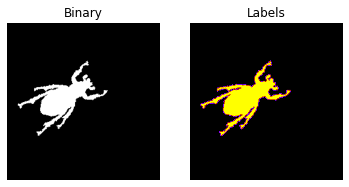

Imagem 170 - classe beetle


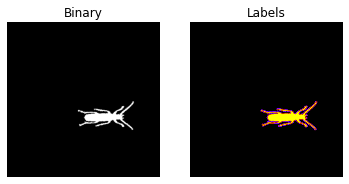

Imagem 171 - classe beetle


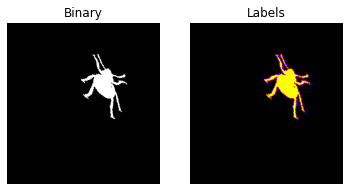

Imagem 172 - classe beetle


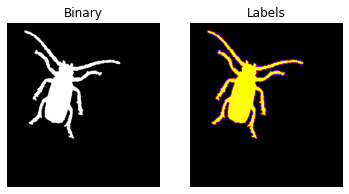

Imagem 173 - classe beetle


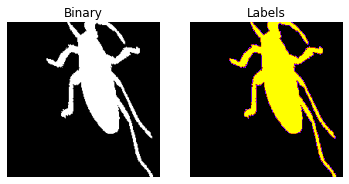

Imagem 174 - classe beetle


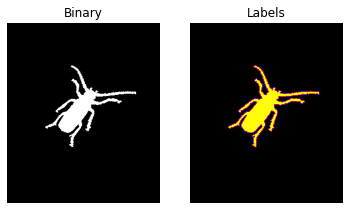

Imagem 175 - classe beetle


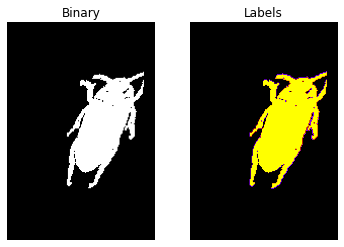

Imagem 176 - classe beetle


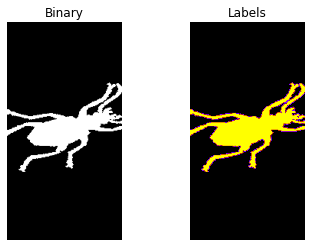

Imagem 177 - classe beetle


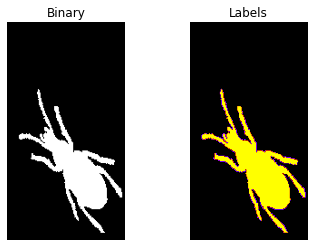

Imagem 178 - classe beetle


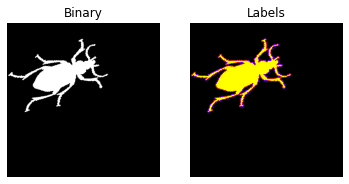

Imagem 179 - classe beetle


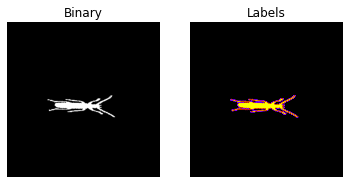

Imagem 180 - classe beetle


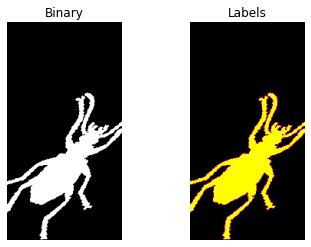

Imagem 181 - classe beetle


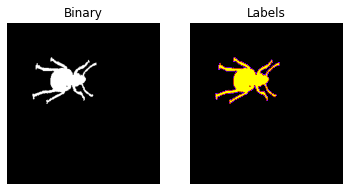

Imagem 182 - classe beetle


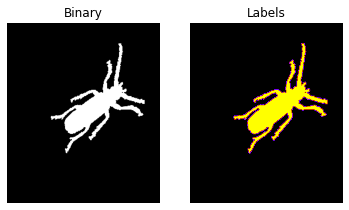

Imagem 183 - classe beetle


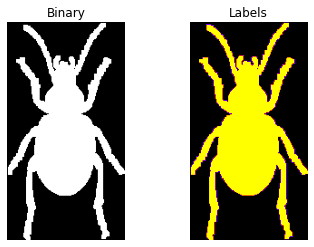

Imagem 184 - classe beetle


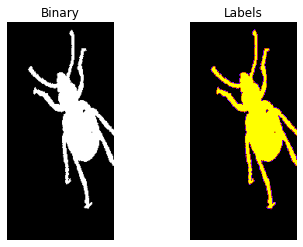

Imagem 185 - classe beetle


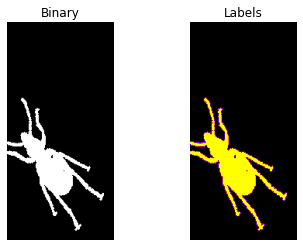

Imagem 186 - classe beetle


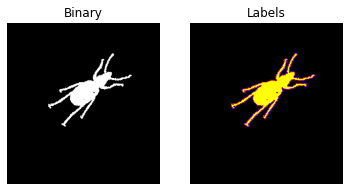

Imagem 187 - classe beetle


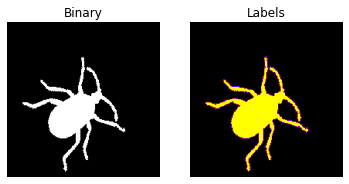

Imagem 188 - classe beetle


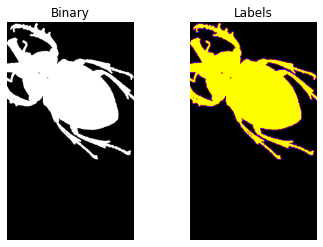

Imagem 189 - classe beetle


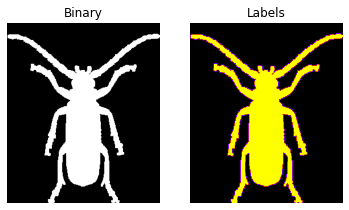

Imagem 190 - classe beetle


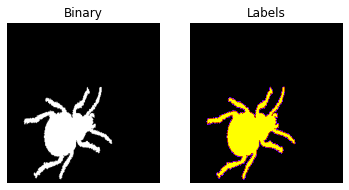

Imagem 191 - classe beetle


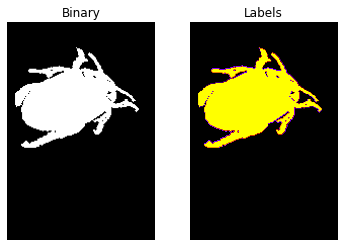

Imagem 192 - classe beetle


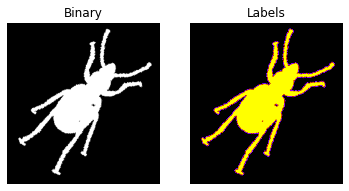

Imagem 193 - classe beetle


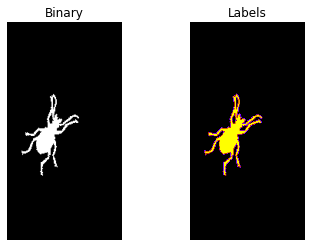

Imagem 194 - classe beetle


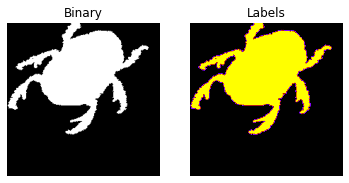

Imagem 195 - classe beetle


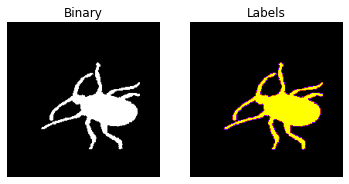

Imagem 196 - classe beetle


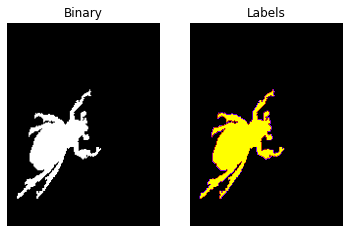

Imagem 197 - classe beetle


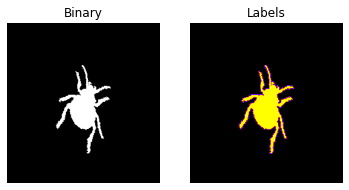

Imagem 198 - classe beetle


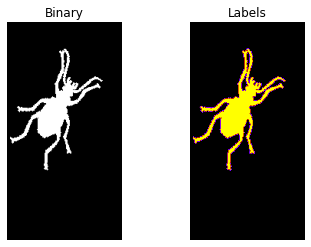

Imagem 199 - classe beetle


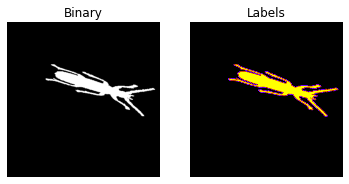

Imagem 200 - classe beetle


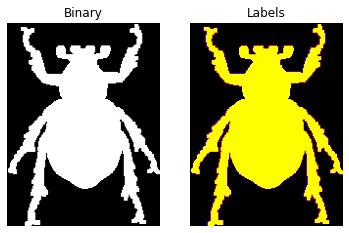

Imagem 201 - classe beetle


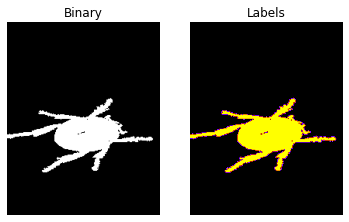

Imagem 202 - classe beetle


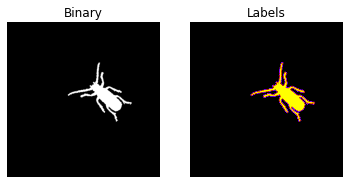

Imagem 203 - classe beetle


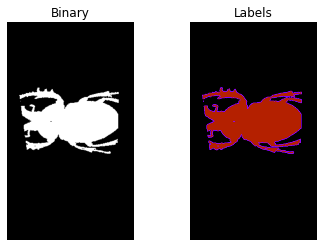

Imagem 204 - classe beetle


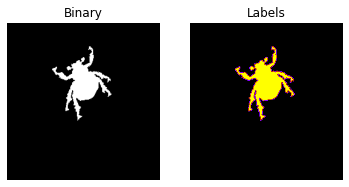

Imagem 205 - classe beetle


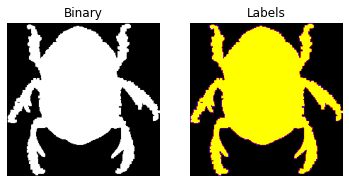

Imagem 206 - classe beetle


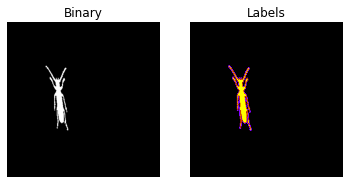

Imagem 207 - classe beetle


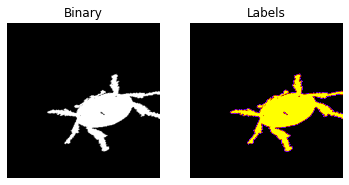

Imagem 208 - classe beetle


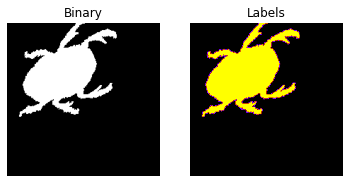

Imagem 209 - classe beetle


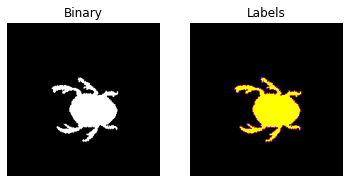

Imagem 210 - classe beetle


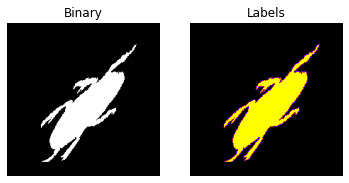

Imagem 211 - classe beetle


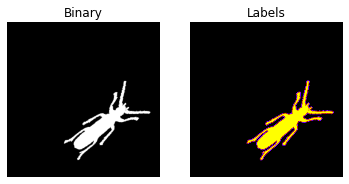

Imagem 212 - classe beetle


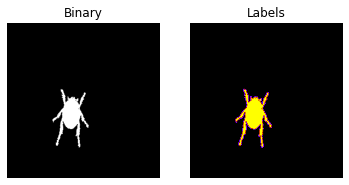

Imagem 213 - classe beetle


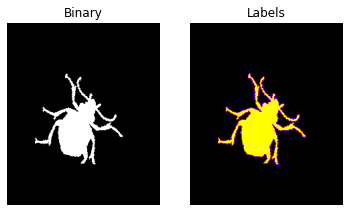

Imagem 214 - classe beetle


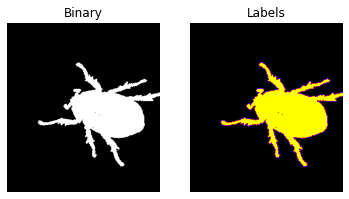

Imagem 215 - classe beetle


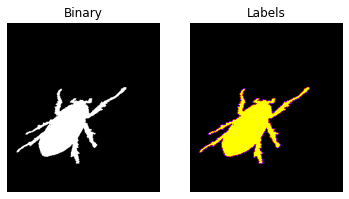

Imagem 216 - classe beetle


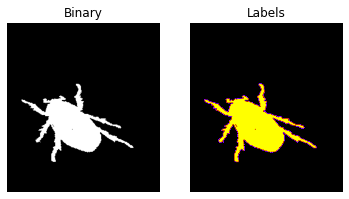

Imagem 217 - classe beetle


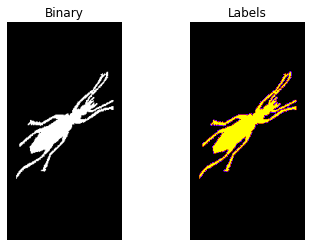

Imagem 218 - classe beetle


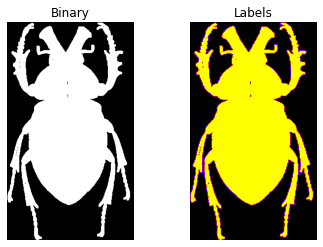

Imagem 219 - classe beetle


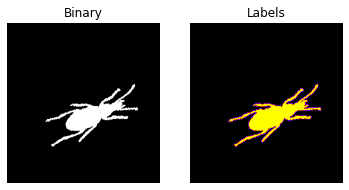

Imagem 220 - classe beetle


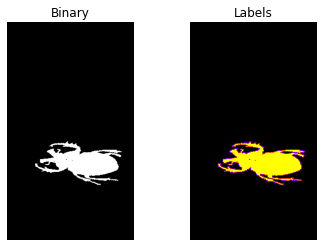

Imagem 221 - classe beetle


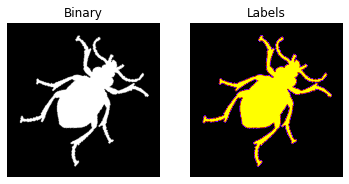

Imagem 222 - classe beetle


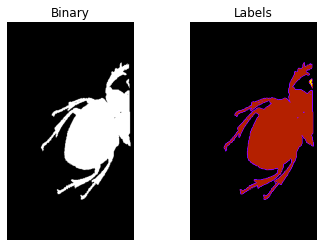

Imagem 223 - classe beetle


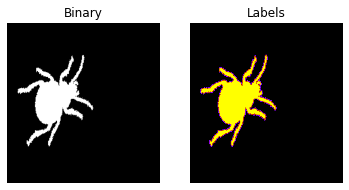

Imagem 224 - classe beetle


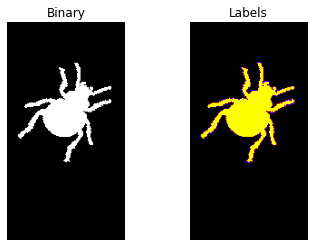

Imagem 225 - classe beetle


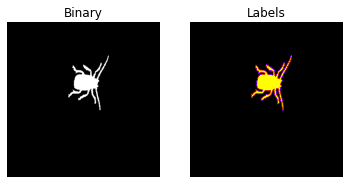

Imagem 226 - classe beetle


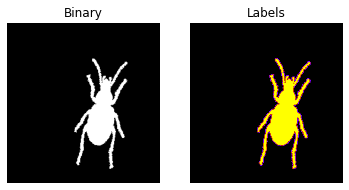

Imagem 227 - classe beetle


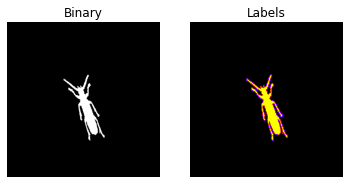

Imagem 228 - classe beetle


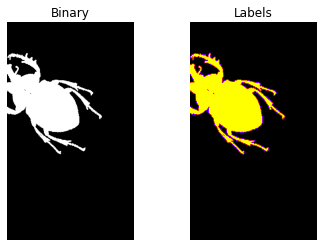

Imagem 229 - classe beetle


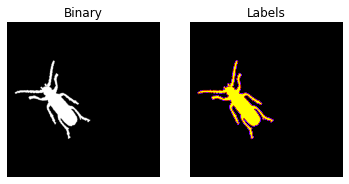

Imagem 230 - classe beetle


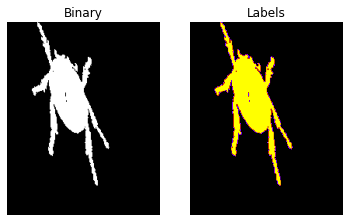

Imagem 231 - classe beetle


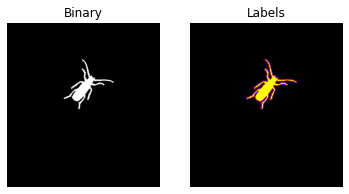

Imagem 232 - classe beetle


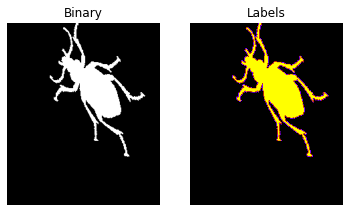

Imagem 233 - classe beetle


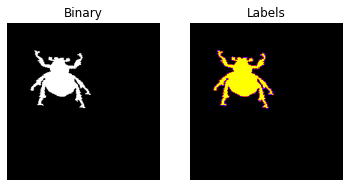

Imagem 234 - classe beetle


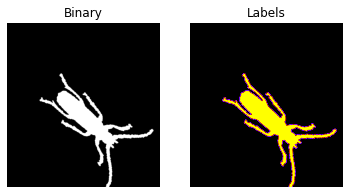

Imagem 235 - classe beetle


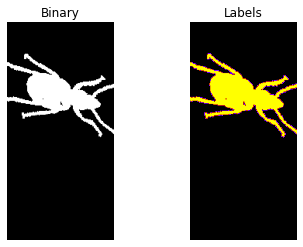

Imagem 236 - classe beetle


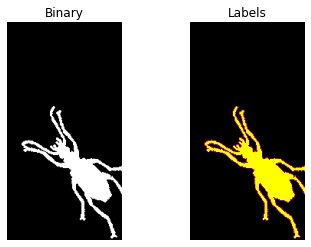

Imagem 237 - classe beetle


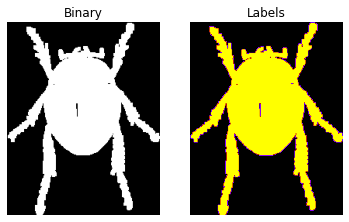

Imagem 238 - classe beetle


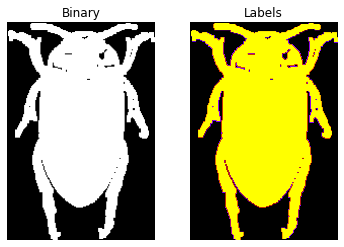

Imagem 239 - classe beetle


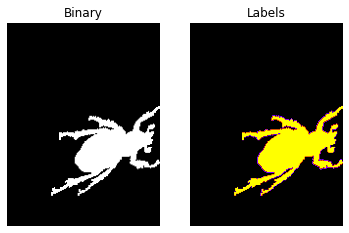

Imagem 240 - classe beetle


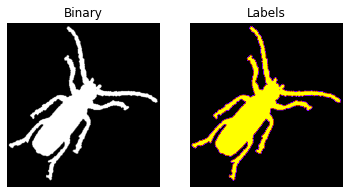

Imagem 241 - classe beetle


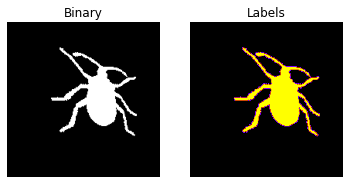

Imagem 242 - classe beetle


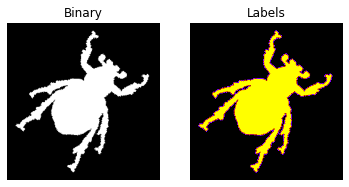

Imagem 243 - classe beetle


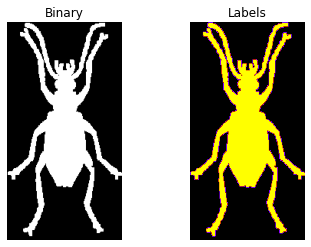

Imagem 244 - classe beetle


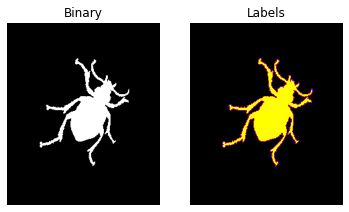

Imagem 245 - classe beetle


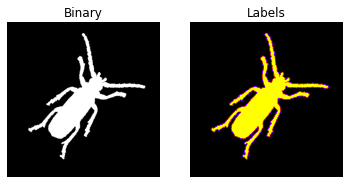

Imagem 246 - classe beetle


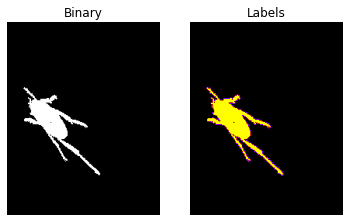

Imagem 247 - classe beetle


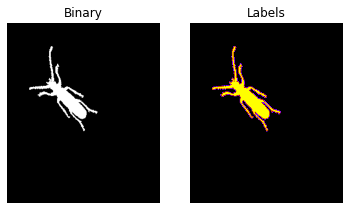

Imagem 248 - classe beetle


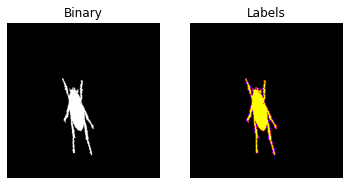

Imagem 249 - classe beetle


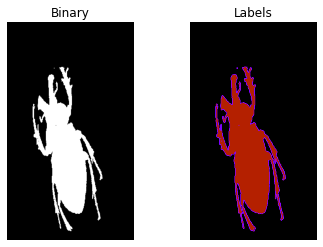

Imagem 250 - classe beetle


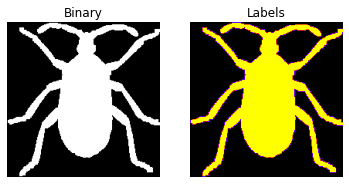

Imagem 251 - classe beetle


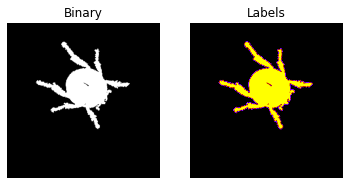

Imagem 252 - classe apple


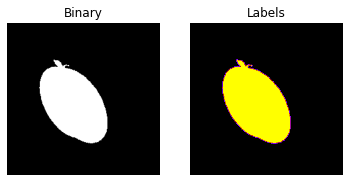

Imagem 253 - classe apple


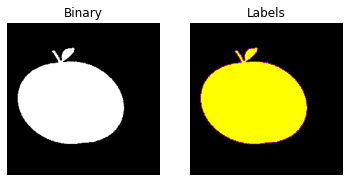

Imagem 254 - classe apple


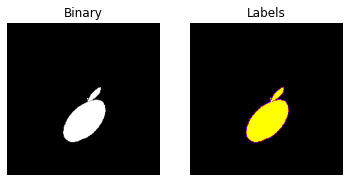

Imagem 255 - classe apple


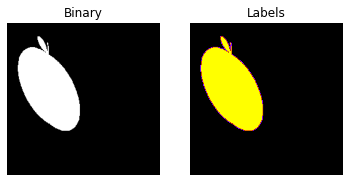

Imagem 256 - classe apple


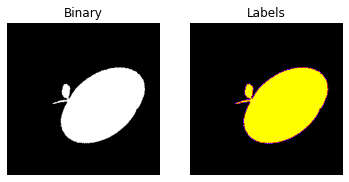

Imagem 257 - classe apple


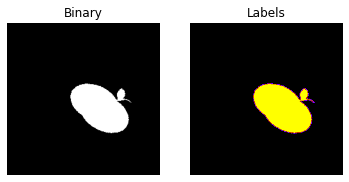

Imagem 258 - classe apple


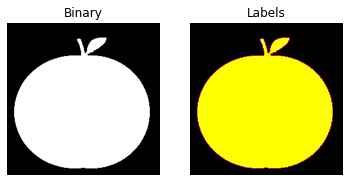

Imagem 259 - classe apple


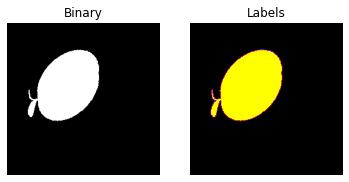

Imagem 260 - classe apple


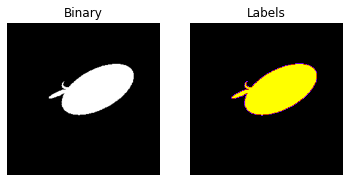

Imagem 261 - classe apple


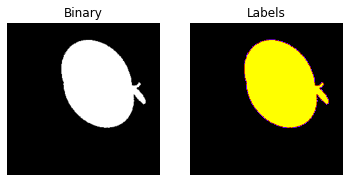

Imagem 262 - classe apple


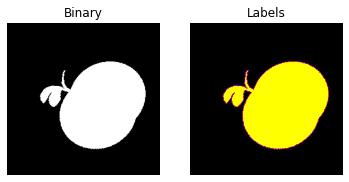

Imagem 263 - classe apple


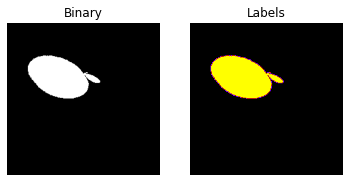

Imagem 264 - classe apple


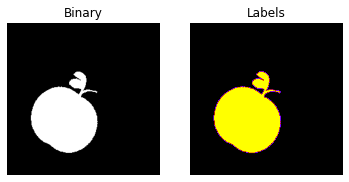

Imagem 265 - classe apple


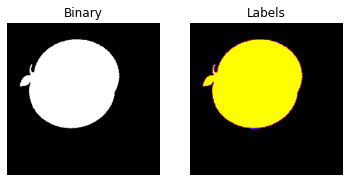

Imagem 266 - classe apple


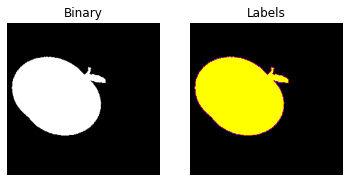

Imagem 267 - classe apple


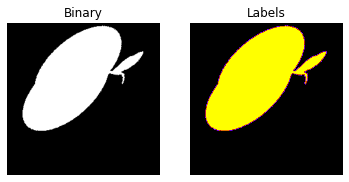

Imagem 268 - classe apple


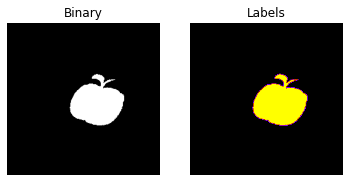

Imagem 269 - classe apple


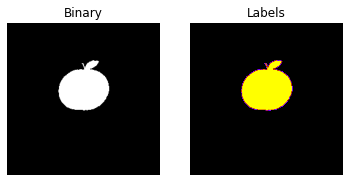

Imagem 270 - classe apple


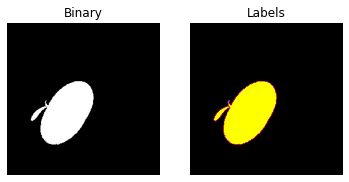

Imagem 271 - classe apple


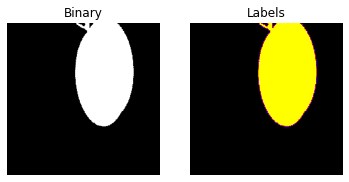

Imagem 272 - classe apple


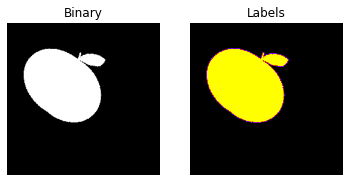

Imagem 273 - classe apple


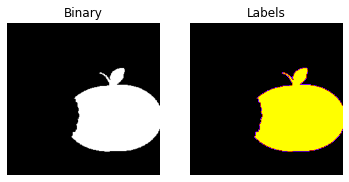

Imagem 274 - classe apple


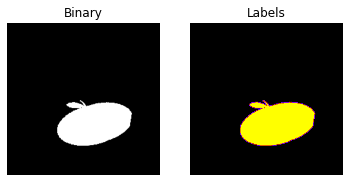

Imagem 275 - classe apple


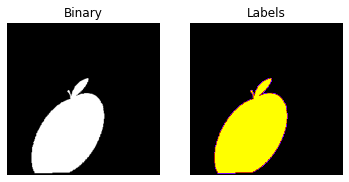

Imagem 276 - classe apple


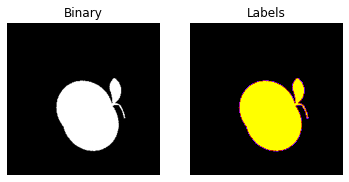

Imagem 277 - classe apple


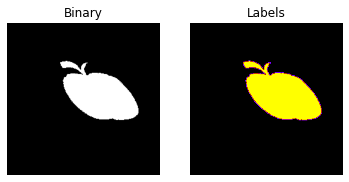

Imagem 278 - classe apple


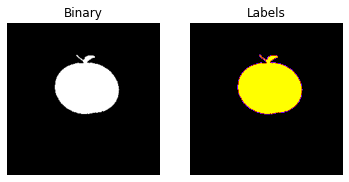

Imagem 279 - classe apple


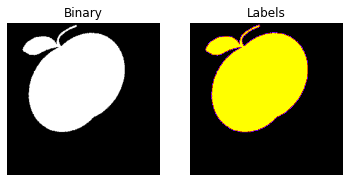

Imagem 280 - classe apple


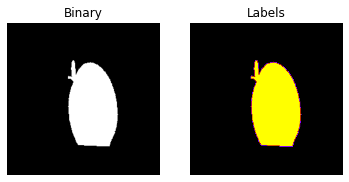

Imagem 281 - classe apple


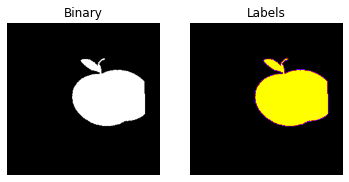

Imagem 282 - classe apple


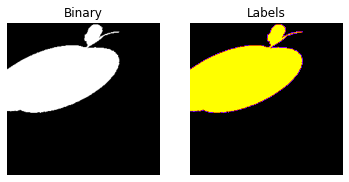

Imagem 283 - classe apple


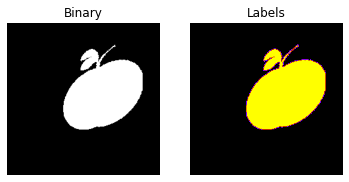

Imagem 284 - classe apple


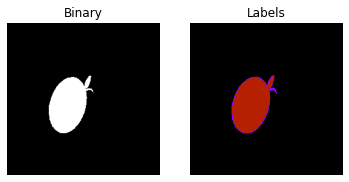

Imagem 285 - classe apple


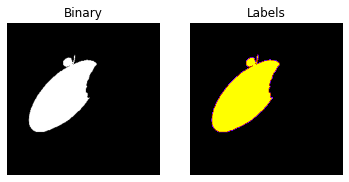

Imagem 286 - classe apple


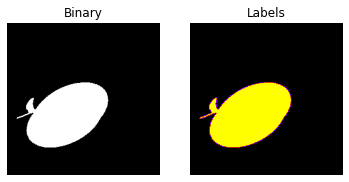

Imagem 287 - classe apple


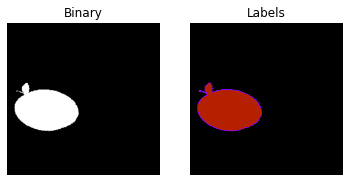

Imagem 288 - classe apple


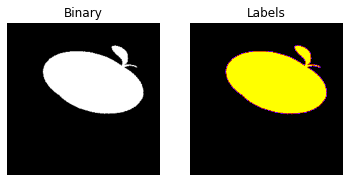

Imagem 289 - classe apple


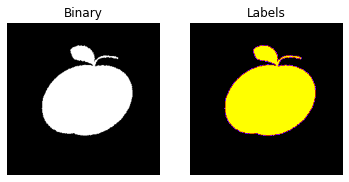

Imagem 290 - classe apple


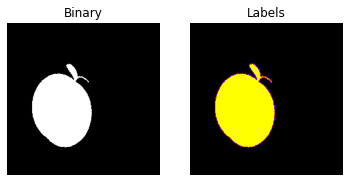

Imagem 291 - classe apple


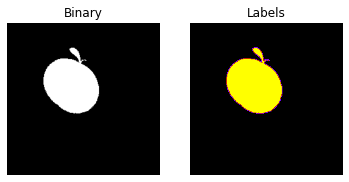

Imagem 292 - classe apple


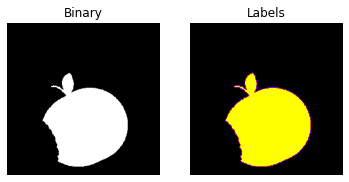

Imagem 293 - classe apple


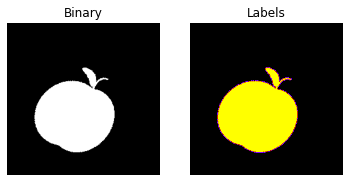

Imagem 294 - classe apple


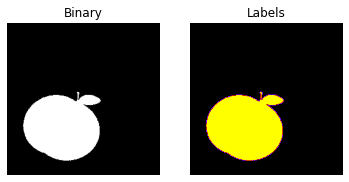

Imagem 295 - classe apple


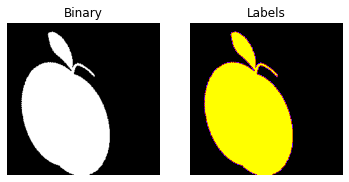

Imagem 296 - classe apple


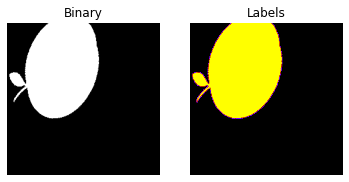

Imagem 297 - classe apple


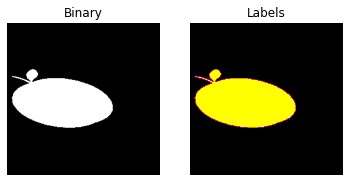

Imagem 298 - classe apple


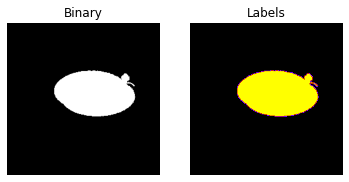

Imagem 299 - classe apple


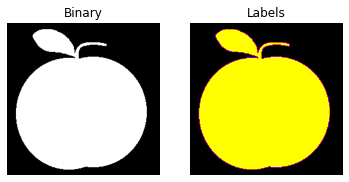

Imagem 300 - classe apple


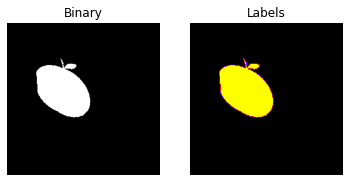

Imagem 301 - classe apple


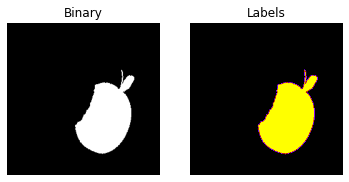

Imagem 302 - classe apple


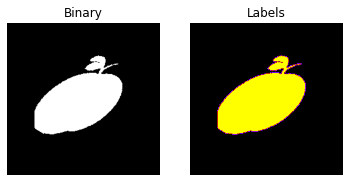

Imagem 303 - classe apple


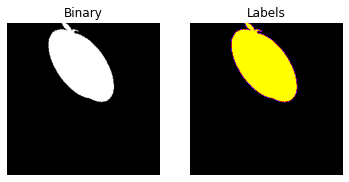

Imagem 304 - classe apple


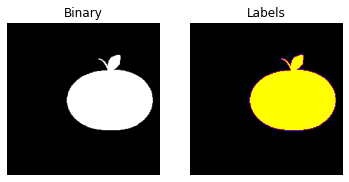

Imagem 305 - classe apple


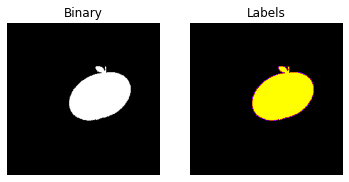

Imagem 306 - classe apple


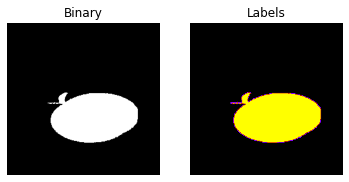

Imagem 307 - classe apple


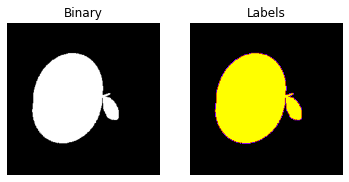

Imagem 308 - classe apple


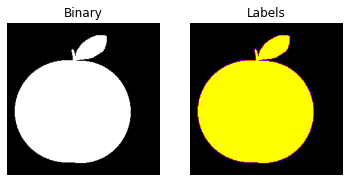

Imagem 309 - classe apple


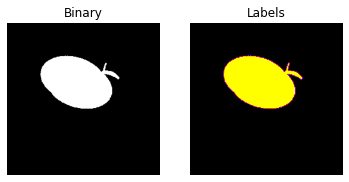

Imagem 310 - classe apple


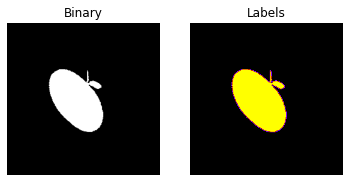

Imagem 311 - classe apple


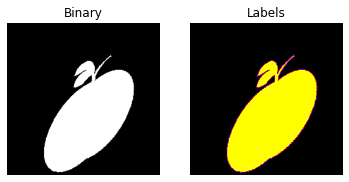

Imagem 312 - classe apple


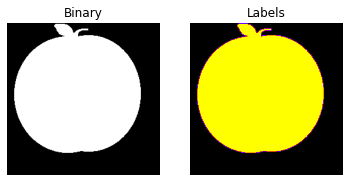

Imagem 313 - classe apple


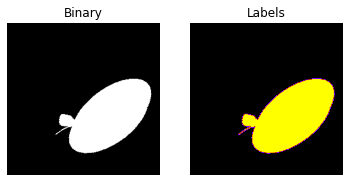

Imagem 314 - classe apple


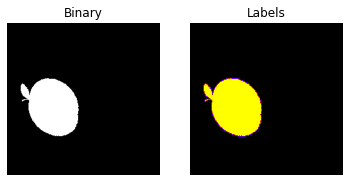

Imagem 315 - classe apple


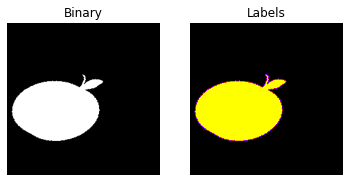

Imagem 316 - classe apple


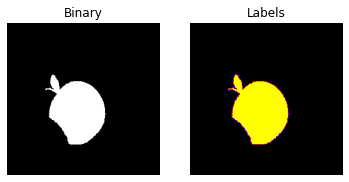

Imagem 317 - classe apple


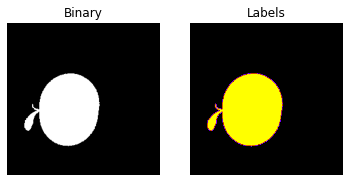

Imagem 318 - classe apple


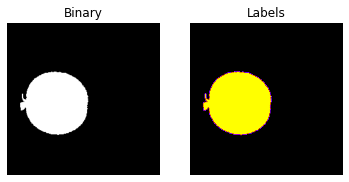

Imagem 319 - classe apple


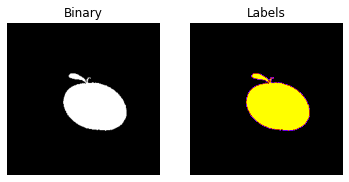

Imagem 320 - classe apple


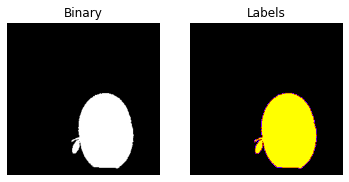

Imagem 321 - classe apple


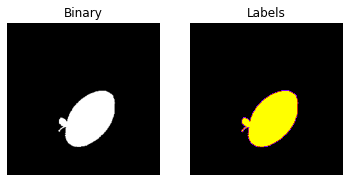

Imagem 322 - classe apple


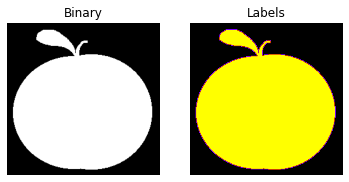

Imagem 323 - classe apple


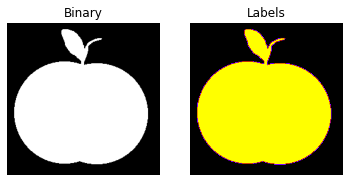

Imagem 324 - classe apple


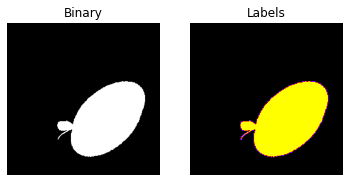

Imagem 325 - classe apple


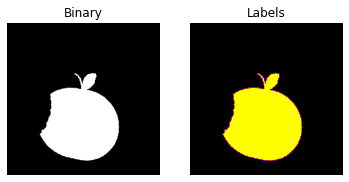

Imagem 326 - classe apple


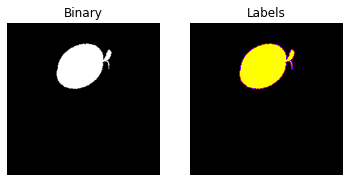

Imagem 327 - classe apple


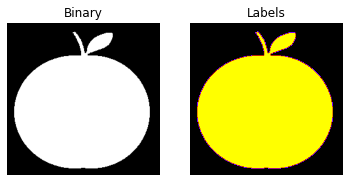

Imagem 328 - classe apple


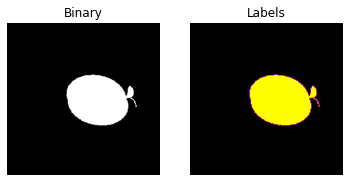

Imagem 329 - classe apple


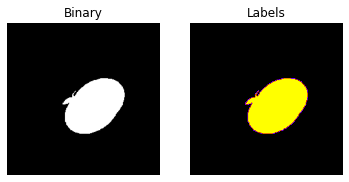

Imagem 330 - classe apple


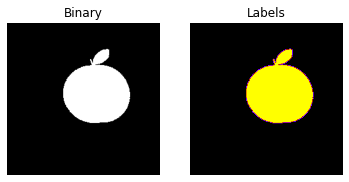

Imagem 331 - classe apple


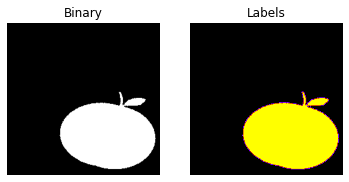

Imagem 332 - classe apple


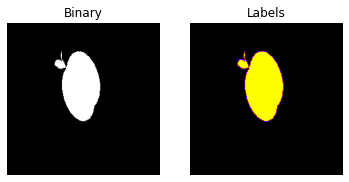

Imagem 333 - classe apple


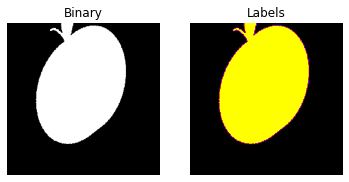

Imagem 334 - classe apple


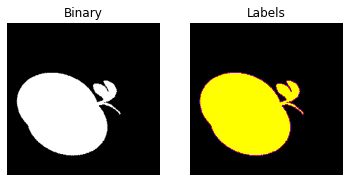

Imagem 335 - classe apple


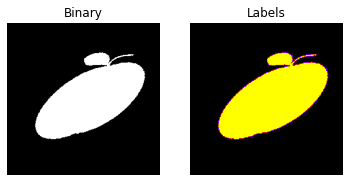

Imagem 336 - classe apple


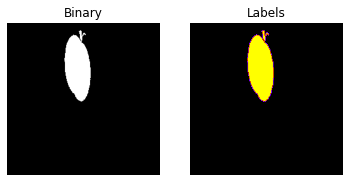

Imagem 337 - classe apple


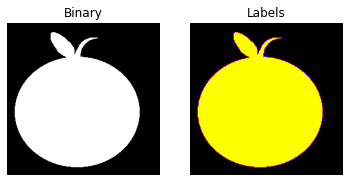

Imagem 338 - classe apple


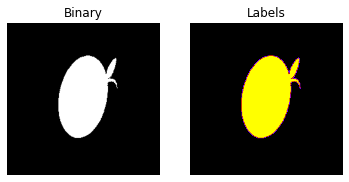

Imagem 339 - classe apple


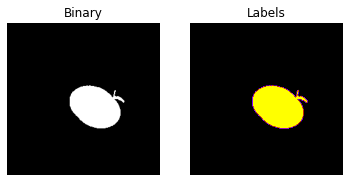

Imagem 340 - classe apple


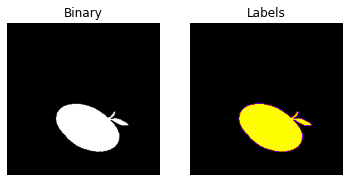

Imagem 341 - classe apple


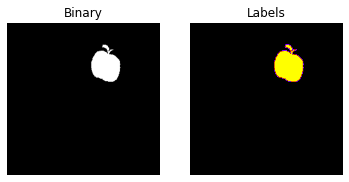

Imagem 342 - classe apple


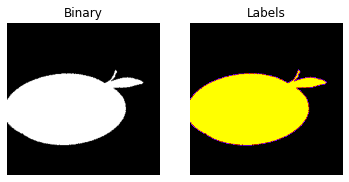

Imagem 343 - classe apple


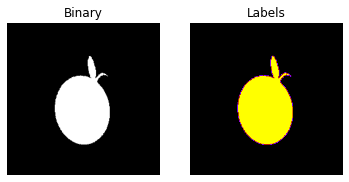

Imagem 344 - classe apple


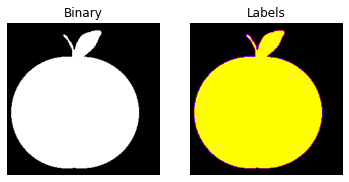

Imagem 345 - classe apple


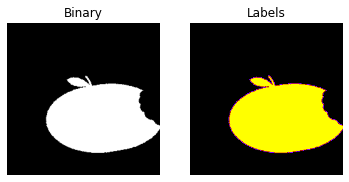

Imagem 346 - classe apple


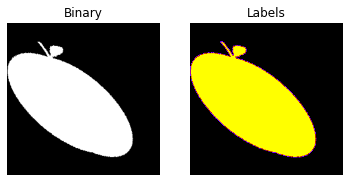

Imagem 347 - classe apple


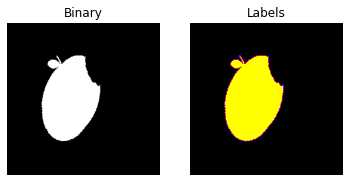

Imagem 348 - classe apple


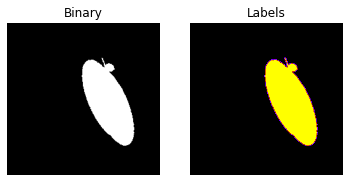

Imagem 349 - classe apple


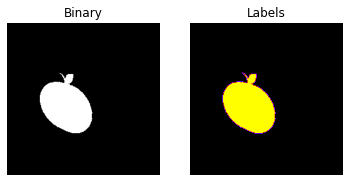

Imagem 350 - classe apple


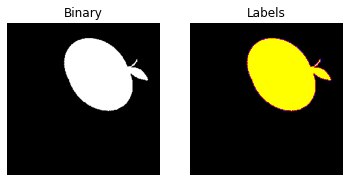

Imagem 351 - classe apple


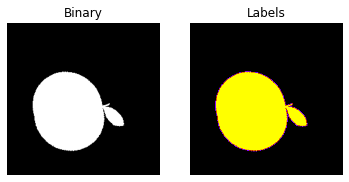

Imagem 352 - classe apple


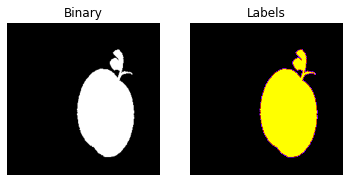

Imagem 353 - classe apple


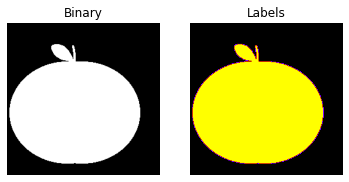

Imagem 354 - classe apple


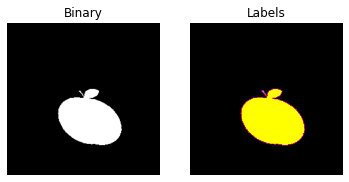

Imagem 355 - classe apple


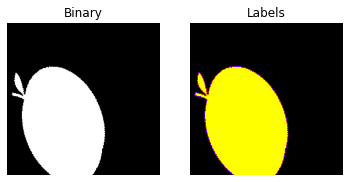

Imagem 356 - classe apple


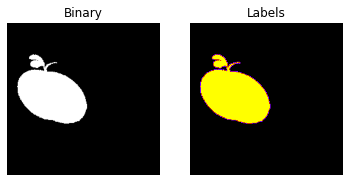

Imagem 357 - classe apple


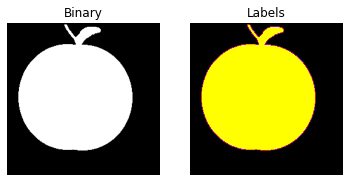

Imagem 358 - classe apple


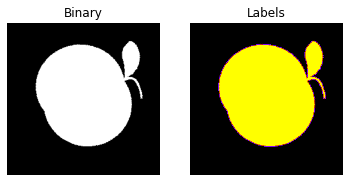

Imagem 359 - classe apple


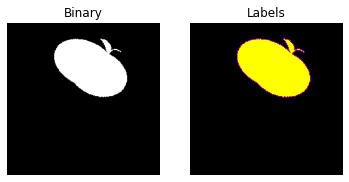

Imagem 360 - classe apple


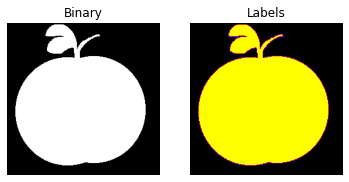

Imagem 361 - classe apple


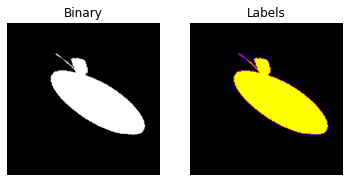

Imagem 362 - classe apple


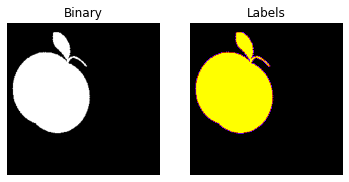

Imagem 363 - classe apple


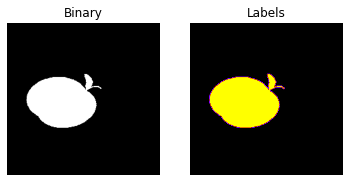

Imagem 364 - classe apple


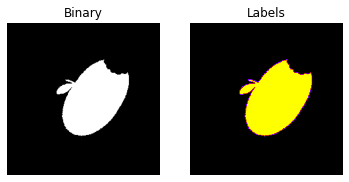

Imagem 365 - classe apple


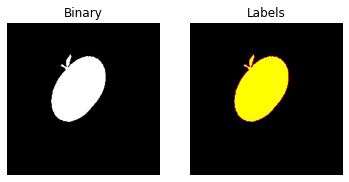

Imagem 366 - classe apple


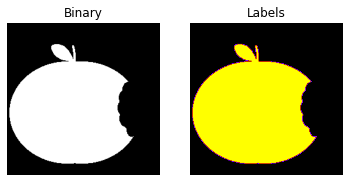

Imagem 367 - classe apple


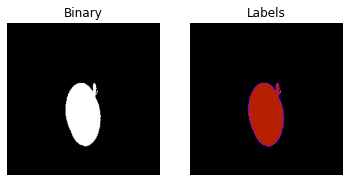

Imagem 368 - classe apple


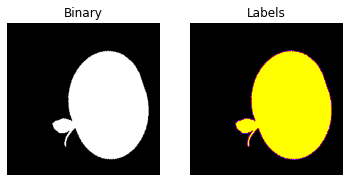

Imagem 369 - classe apple


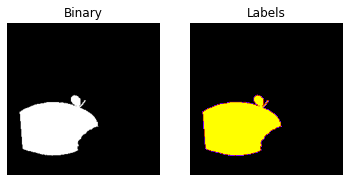

Imagem 370 - classe apple


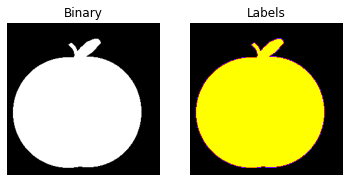

Imagem 371 - classe apple


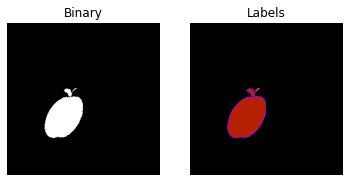

Imagem 372 - classe apple


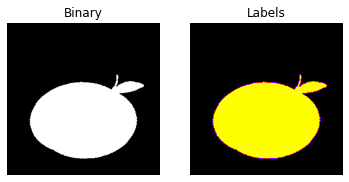

Imagem 373 - classe apple


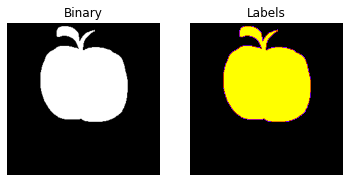

Imagem 374 - classe apple


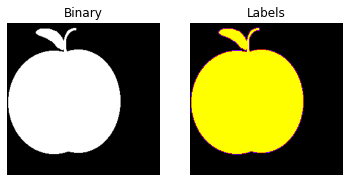

Imagem 375 - classe apple


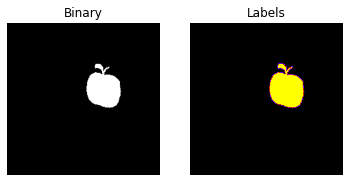

Imagem 376 - classe apple


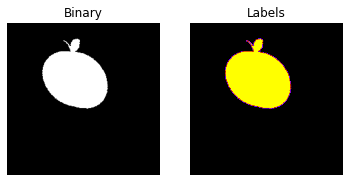

Imagem 377 - classe apple


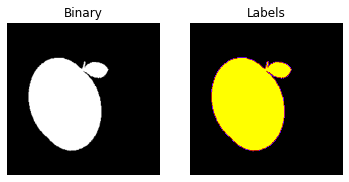

Imagem 378 - classe bat


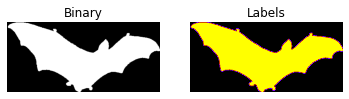

Imagem 379 - classe bat


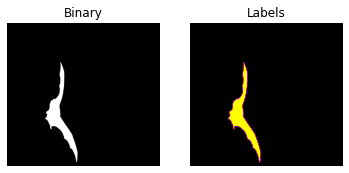

Imagem 380 - classe bat


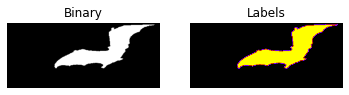

Imagem 381 - classe bat


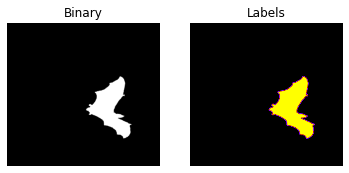

Imagem 382 - classe bat


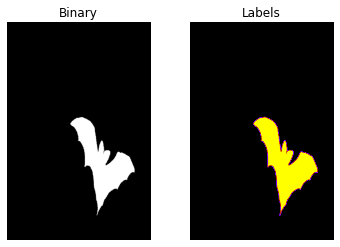

Imagem 383 - classe bat


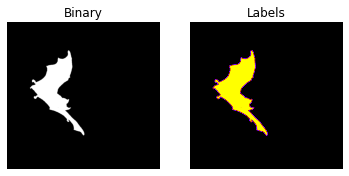

Imagem 384 - classe bat


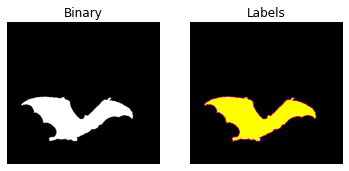

Imagem 385 - classe bat


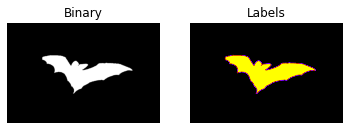

Imagem 386 - classe bat


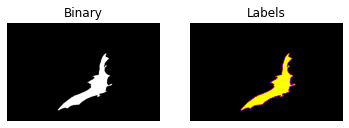

Imagem 387 - classe bat


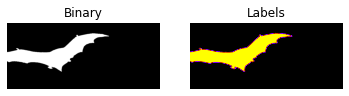

Imagem 388 - classe bat


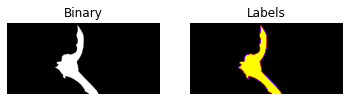

Imagem 389 - classe bat


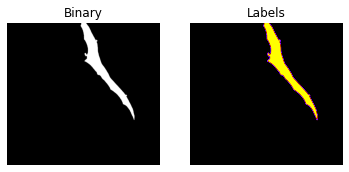

Imagem 390 - classe bat


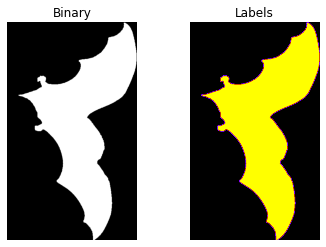

Imagem 391 - classe bat


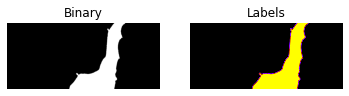

Imagem 392 - classe bat


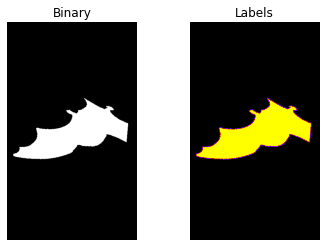

Imagem 393 - classe bat


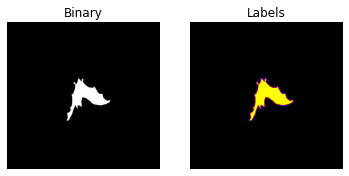

Imagem 394 - classe bat


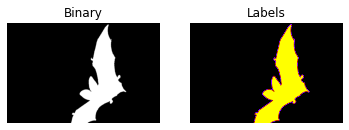

Imagem 395 - classe bat


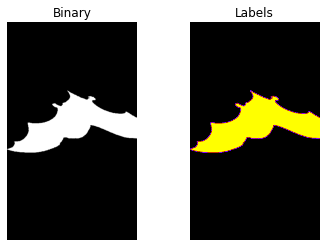

Imagem 396 - classe bat


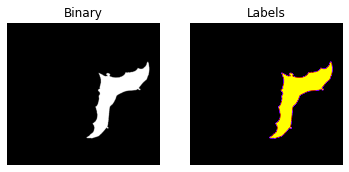

Imagem 397 - classe bat


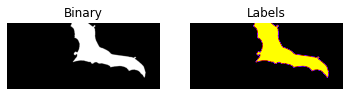

Imagem 398 - classe bat


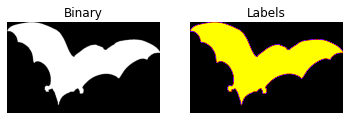

Imagem 399 - classe bat


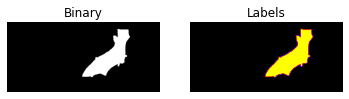

Imagem 400 - classe bat


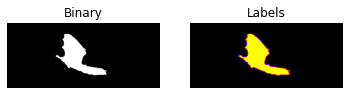

Imagem 401 - classe bat


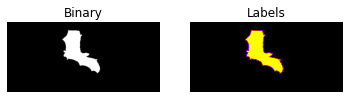

Imagem 402 - classe bat


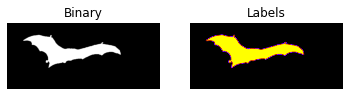

Imagem 403 - classe bat


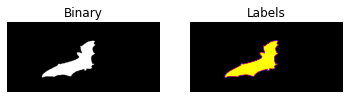

Imagem 404 - classe bat


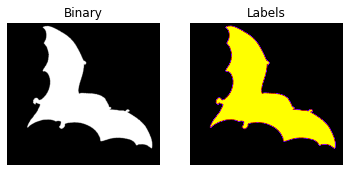

Imagem 405 - classe bat


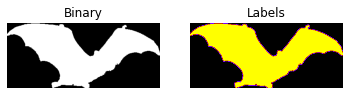

Imagem 406 - classe bat


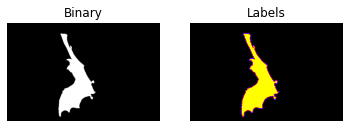

Imagem 407 - classe bat


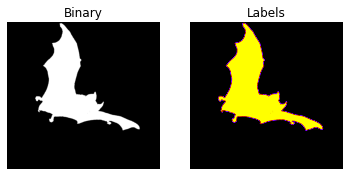

Imagem 408 - classe bat


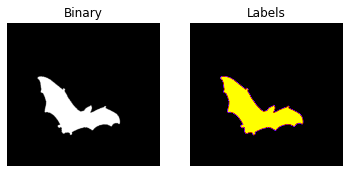

Imagem 409 - classe bat


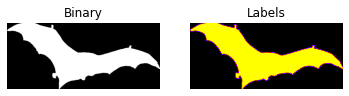

Imagem 410 - classe bat


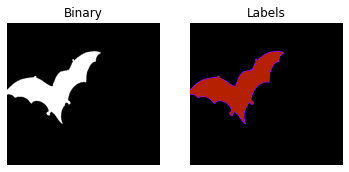

Imagem 411 - classe bat


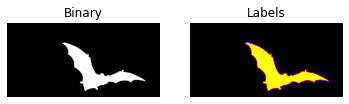

Imagem 412 - classe bat


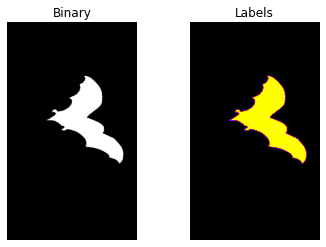

Imagem 413 - classe bat


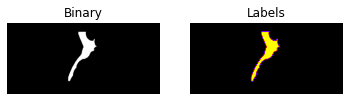

Imagem 414 - classe bat


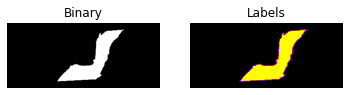

Imagem 415 - classe bat


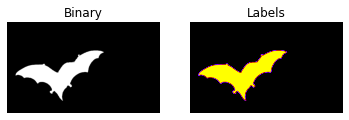

Imagem 416 - classe bat


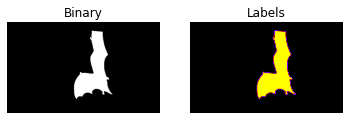

Imagem 417 - classe bat


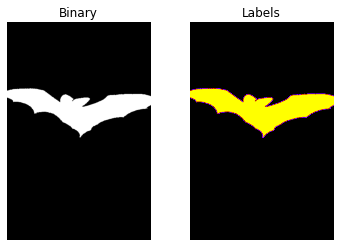

Imagem 418 - classe bat


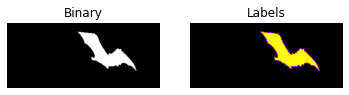

Imagem 419 - classe bat


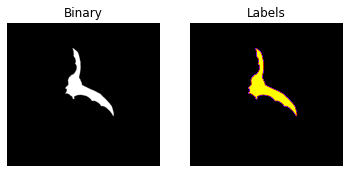

Imagem 420 - classe bat


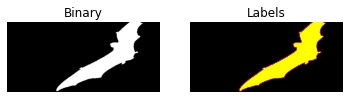

Imagem 421 - classe bat


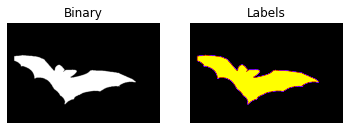

Imagem 422 - classe bat


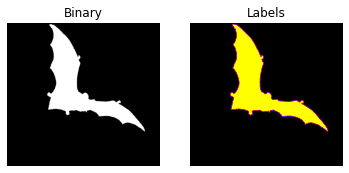

Imagem 423 - classe bat


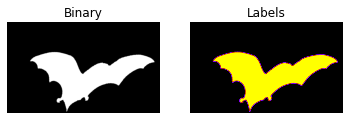

Imagem 424 - classe bat


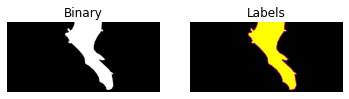

Imagem 425 - classe bat


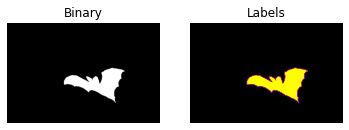

Imagem 426 - classe bat


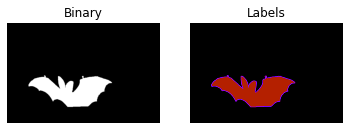

Imagem 427 - classe bat


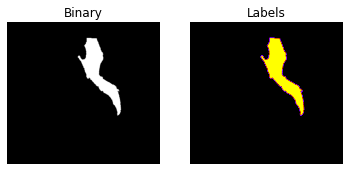

Imagem 428 - classe bat


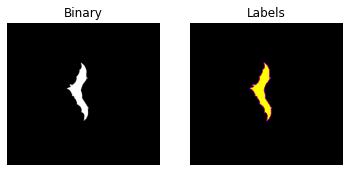

Imagem 429 - classe bat


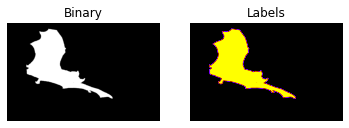

Imagem 430 - classe bat


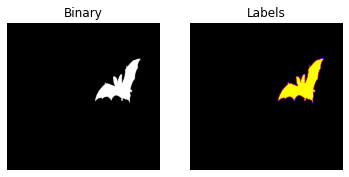

Imagem 431 - classe bat


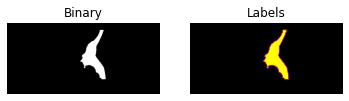

Imagem 432 - classe bat


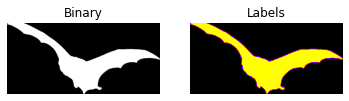

Imagem 433 - classe bat


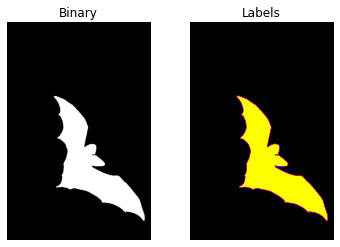

Imagem 434 - classe bat


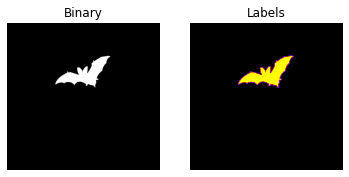

Imagem 435 - classe bat


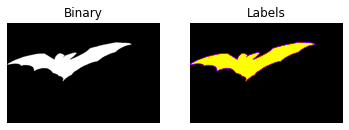

Imagem 436 - classe bat


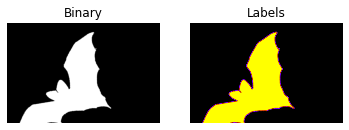

Imagem 437 - classe bat


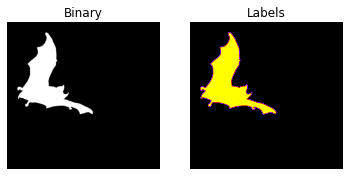

Imagem 438 - classe bat


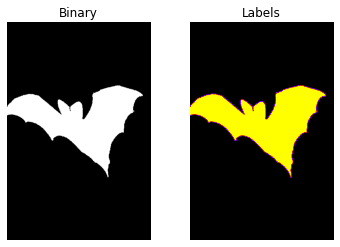

Imagem 439 - classe bat


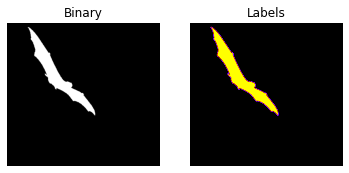

Imagem 440 - classe bat


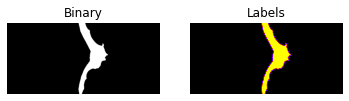

Imagem 441 - classe bat


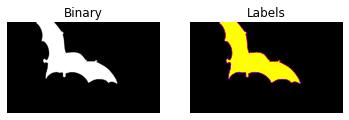

Imagem 442 - classe bat


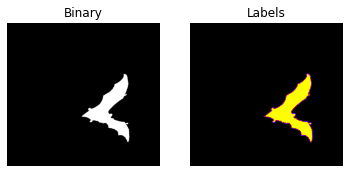

Imagem 443 - classe bat


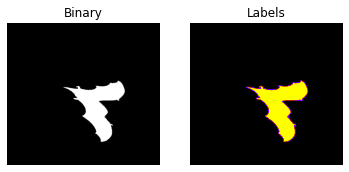

Imagem 444 - classe bat


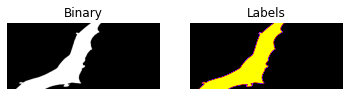

Imagem 445 - classe bat


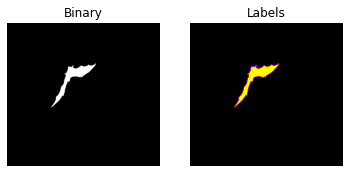

Imagem 446 - classe bat


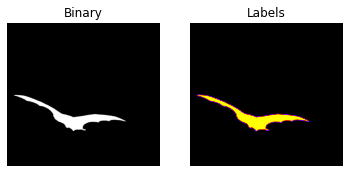

Imagem 447 - classe bat


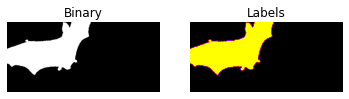

Imagem 448 - classe bat


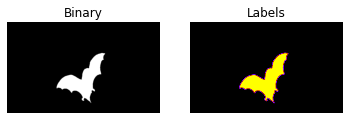

Imagem 449 - classe bat


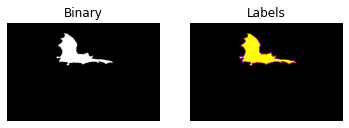

Imagem 450 - classe bat


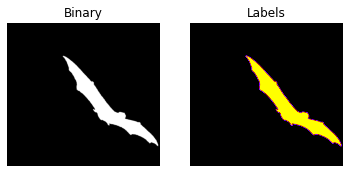

Imagem 451 - classe bat


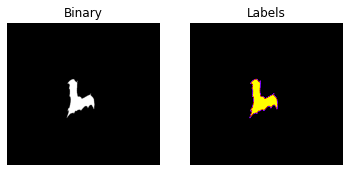

Imagem 452 - classe bat


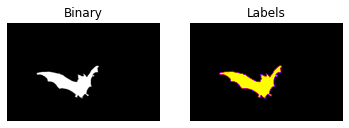

Imagem 453 - classe bat


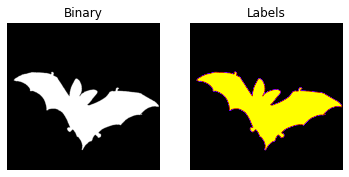

Imagem 454 - classe bat


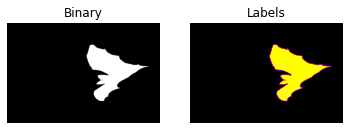

Imagem 455 - classe bat


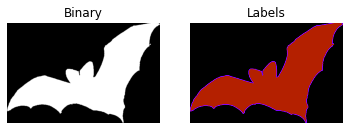

Imagem 456 - classe bat


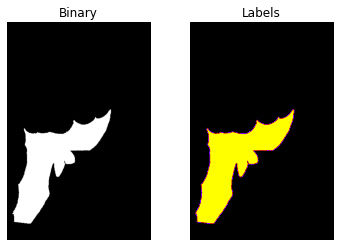

Imagem 457 - classe bat


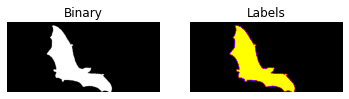

Imagem 458 - classe bat


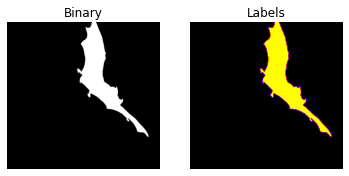

Imagem 459 - classe bat


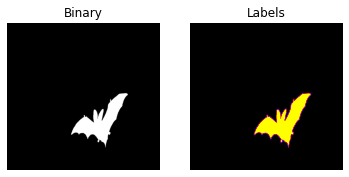

Imagem 460 - classe bat


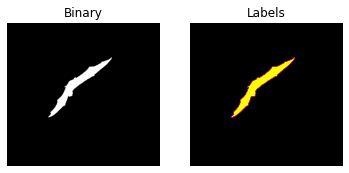

Imagem 461 - classe bat


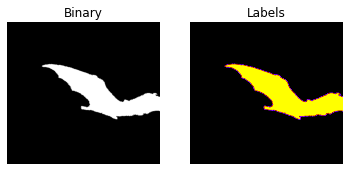

Imagem 462 - classe bat


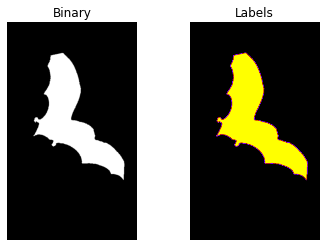

Imagem 463 - classe bat


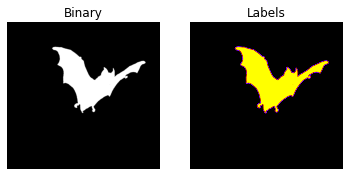

Imagem 464 - classe bat


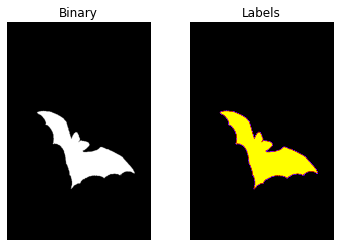

Imagem 465 - classe bat


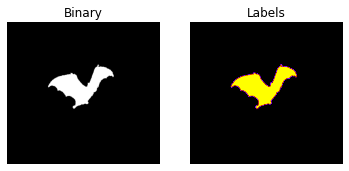

Imagem 466 - classe bat


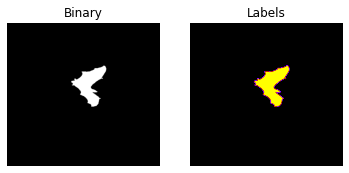

Imagem 467 - classe bat


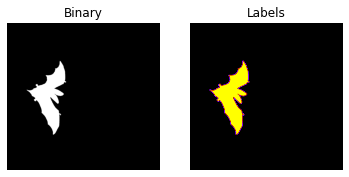

Imagem 468 - classe bat


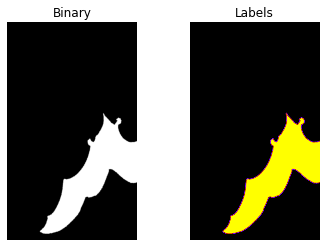

Imagem 469 - classe bat


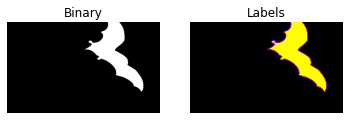

Imagem 470 - classe bat


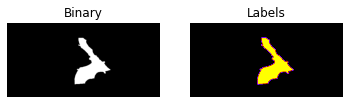

Imagem 471 - classe bat


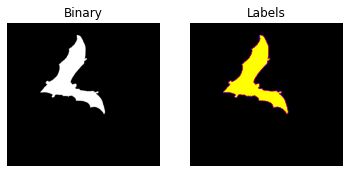

Imagem 472 - classe bat


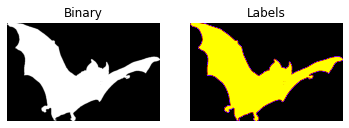

Imagem 473 - classe bat


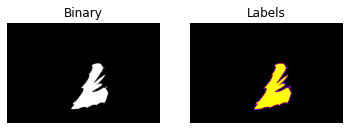

Imagem 474 - classe bat


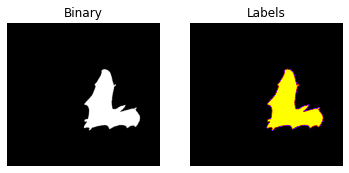

Imagem 475 - classe bat


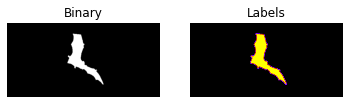

Imagem 476 - classe bat


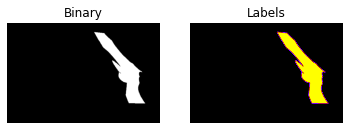

Imagem 477 - classe bat


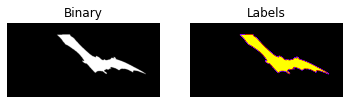

Imagem 478 - classe bat


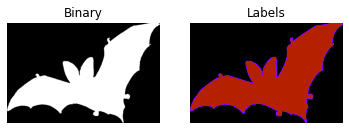

Imagem 479 - classe bat


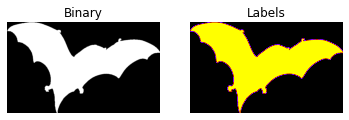

Imagem 480 - classe bat


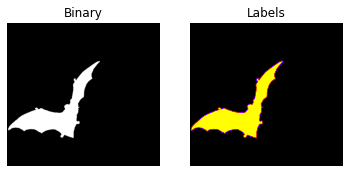

Imagem 481 - classe bat


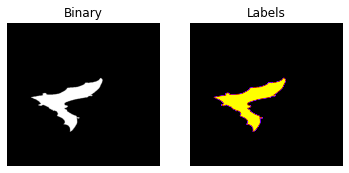

Imagem 482 - classe bat


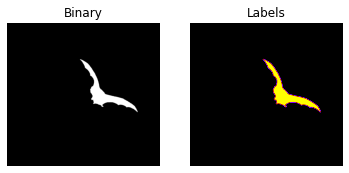

Imagem 483 - classe bat


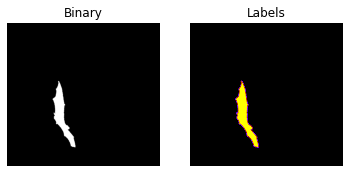

Imagem 484 - classe bat


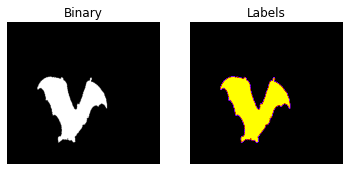

Imagem 485 - classe bat


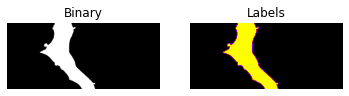

Imagem 486 - classe bat


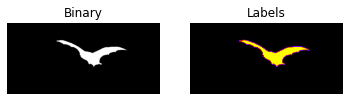

Imagem 487 - classe bat


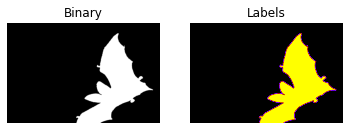

Imagem 488 - classe bat


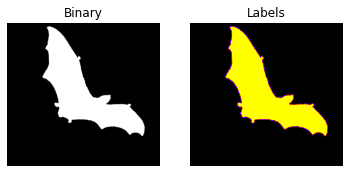

Imagem 489 - classe bat


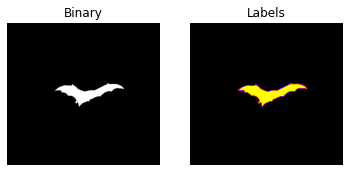

Imagem 490 - classe bat


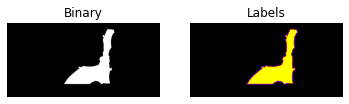

Imagem 491 - classe bat


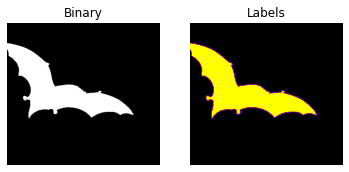

Imagem 492 - classe bat


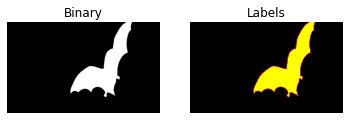

Imagem 493 - classe bat


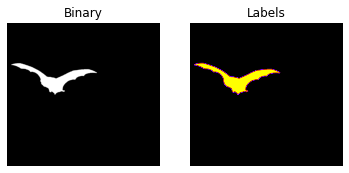

Imagem 494 - classe bat


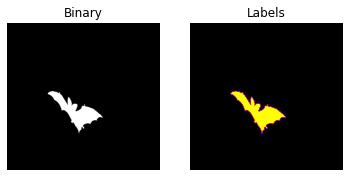

Imagem 495 - classe bat


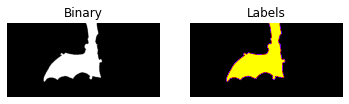

Imagem 496 - classe bat


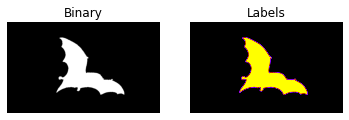

Imagem 497 - classe bat


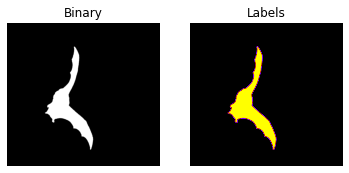

Imagem 498 - classe bat


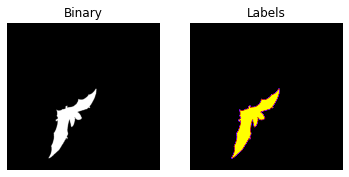

Imagem 499 - classe bat


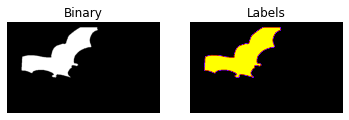

Imagem 500 - classe bat


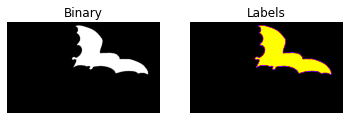

Imagem 501 - classe bat


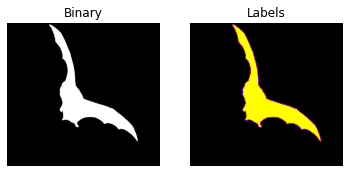

Imagem 502 - classe bat


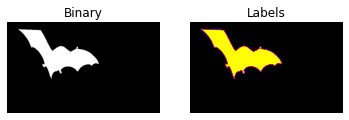

Imagem 503 - classe bat


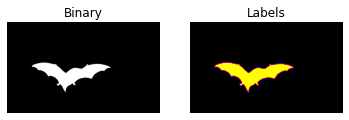

In [378]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']
# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Segmenta a imagem
    # --------------------------------------------------
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    # DEBUG
    ##print(img_float.shape, img_float.min(), img_float.max())
    
    # Converte imagem para níveis de cinza
    img_float = color.rgb2gray(color.rgba2rgb(img_float))
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float > filters.threshold_otsu(img_float)
    # DEBUG
    ###print(img_seg.shape, img_seg.min(), img_seg.max())
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    #props = measure.regionprops(im_lbl)
    plots = {'Binary': img_seg, 'Labels': im_lbl}
    fig, ax = plt.subplots(1, len(plots))
    for n, (title, img) in enumerate(plots.items()):
        cmap = plt.cm.gnuplot if n == len(plots) - 1 else plt.cm.gray
        ax[n].imshow(img, cmap=cmap)
        ax[n].axis('off')
        ax[n].set_title(title)
    plt.show(fig)

    props = measure.regionprops(im_lbl)
    """
    ###print(len(props))
    if i == len(props) - 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue
"""
    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

In [379]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map)

[[ 4398.       340.8744    31.762      0.4653     0.9956]
 [36863.       603.4536   119.6987     0.5956     0.9801]
 [ 4953.       249.2702    53.161      0.4734     0.977 ]
 ...
 [54152.       647.6203   267.6524     0.4669     0.9106]
 [25636.       344.554    136.294      0.6795     0.9184]
 [15751.       316.5274   100.2866     0.6517     0.9485]]


In [380]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[1.     0.     0.     0.3297 0.    ]
[105251.        707.3031    364.5932      1.          1.    ]
[14926.8214   252.9488   100.2164     0.6344     0.8128]
[15085.2462   150.0867    57.2206     0.2028     0.205 ]


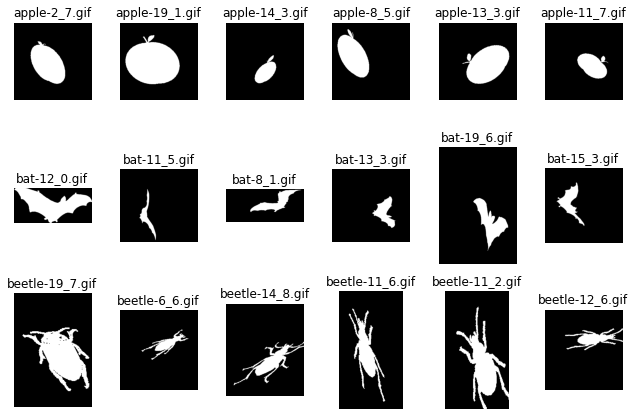

In [381]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(3):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]
fig, ax  = plt.subplots(3, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    ax[i//6, i%6].axis('off')
    
fig.tight_layout()
plt.show()

In [382]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

### print(df)
display(df)

area  major_axis  minor_axis  solidity  eccentricity class
0     4398.0  340.874400   31.762009  0.465298      0.995649  bone
1    36863.0  603.453560  119.698667  0.595602      0.980130  bone
2     4953.0  249.270233   53.160967  0.473382      0.976994  bone
3     4950.0  281.668109   64.834349  0.394014      0.973148  bone
4     5441.0  246.109485   54.878113  0.446569      0.974822  bone
..       ...         ...         ...       ...           ...   ...
499  28891.0  362.931586  137.940083  0.682599      0.924957   bat
500  26666.0  355.120437  147.726168  0.670742      0.909370   bat
501  54152.0  647.620337  267.652429  0.466868      0.910601   bat
502  25636.0  344.554047  136.293952  0.679495      0.918437   bat
503  15751.0  316.527360  100.286570  0.651676      0.948481   bat

[504 rows x 6 columns]

In [383]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[14926.8214   252.9488   100.2164     0.6344     0.8128]
Desvio padrão:
[15085.2462   150.0867    57.2206     0.2028     0.205 ]


In [384]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

print(feature_map_norm)

[[-6.97954896e-01  5.85831723e-01 -1.19632380e+00 -8.33905186e-01
   8.91947376e-01]
 [ 1.45414787e+00  2.33534774e+00  3.40476103e-01 -1.91466482e-01
   8.16224925e-01]
 [-6.61163982e-01 -2.45097714e-02 -8.22351015e-01 -7.94048259e-01
   8.00924010e-01]
 ...
 [ 2.60023457e+00  2.62962274e+00  2.92614775e+00 -8.26167129e-01
   4.76980036e-01]
 [ 7.09910760e-01  6.10348525e-01  6.30498851e-01  2.22154379e-01
   5.15214336e-01]
 [ 5.46347446e-02  4.23611933e-01  1.22612636e-03  8.49943510e-02
   6.61803239e-01]]


In [385]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[-0. -0.  0.  0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


In [386]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)

df_norm['class'] = label_list
print(df_norm)

         area  major_axis  minor_axis  solidity  eccentricity class
0   -0.697955    0.585832   -1.196324 -0.833905      0.891947  bone
1    1.454148    2.335348    0.340476 -0.191466      0.816225  bone
2   -0.661164   -0.024510   -0.822351 -0.794048      0.800924  bone
3   -0.661363    0.191351   -0.618344 -1.185359      0.782159  bone
4   -0.628814   -0.045569   -0.792342 -0.926246      0.790328  bone
..        ...         ...         ...       ...           ...   ...
499  0.925685    0.732795    0.659267  0.237456      0.547024   bat
500  0.778189    0.680750    0.830291  0.178995      0.470971   bat
501  2.600235    2.629623    2.926148 -0.826167      0.476980   bat
502  0.709911    0.610349    0.630499  0.222154      0.515214   bat
503  0.054635    0.423612    0.001226  0.084994      0.661803   bat

[504 rows x 6 columns]


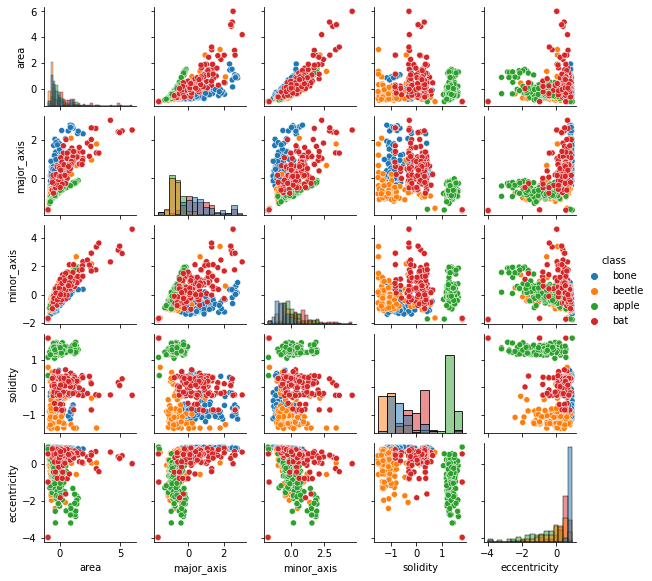

In [387]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [388]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[14926.8214   252.9488   100.2164     0.6344     0.8128]
Desvio padrão:
[15085.2462   150.0867    57.2206     0.2028     0.205 ]


In [389]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

print(feature_map_norm)

[[-6.97954896e-01  5.85831723e-01 -1.19632380e+00 -8.33905186e-01
   8.91947376e-01]
 [ 1.45414787e+00  2.33534774e+00  3.40476103e-01 -1.91466482e-01
   8.16224925e-01]
 [-6.61163982e-01 -2.45097714e-02 -8.22351015e-01 -7.94048259e-01
   8.00924010e-01]
 ...
 [ 2.60023457e+00  2.62962274e+00  2.92614775e+00 -8.26167129e-01
   4.76980036e-01]
 [ 7.09910760e-01  6.10348525e-01  6.30498851e-01  2.22154379e-01
   5.15214336e-01]
 [ 5.46347446e-02  4.23611933e-01  1.22612636e-03  8.49943510e-02
   6.61803239e-01]]


In [390]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[-0. -0.  0.  0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


In [392]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)

df_norm['class'] = label_list
print(df_norm)

         area  major_axis  minor_axis  solidity  eccentricity class
0   -0.697955    0.585832   -1.196324 -0.833905      0.891947  bone
1    1.454148    2.335348    0.340476 -0.191466      0.816225  bone
2   -0.661164   -0.024510   -0.822351 -0.794048      0.800924  bone
3   -0.661363    0.191351   -0.618344 -1.185359      0.782159  bone
4   -0.628814   -0.045569   -0.792342 -0.926246      0.790328  bone
..        ...         ...         ...       ...           ...   ...
499  0.925685    0.732795    0.659267  0.237456      0.547024   bat
500  0.778189    0.680750    0.830291  0.178995      0.470971   bat
501  2.600235    2.629623    2.926148 -0.826167      0.476980   bat
502  0.709911    0.610349    0.630499  0.222154      0.515214   bat
503  0.054635    0.423612    0.001226  0.084994      0.661803   bat

[504 rows x 6 columns]


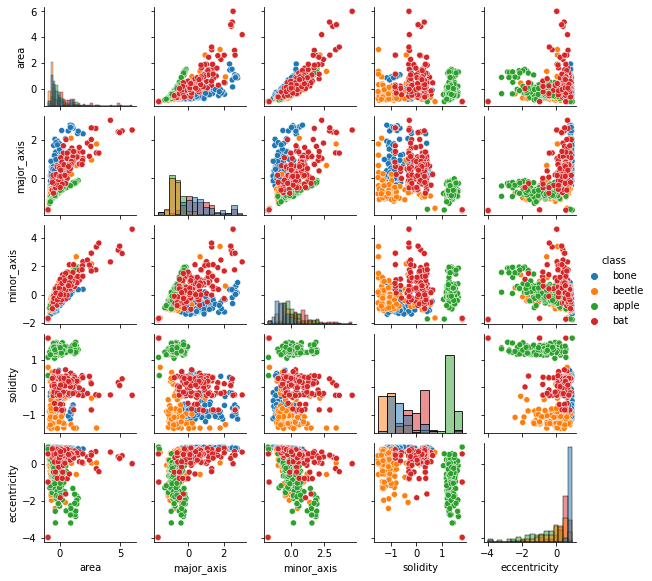

In [393]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [394]:
# Selecionamos apenas duas caracteristicas: Área e maior-eixo
feature_map_ok = feature_map[:,0:2]

# Separa o conjunto de dados em 'feature_map_ok', de acordo com 'label_list'. 
# 30% das imagens vão para o conjunto de testes.
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_map_ok, 
                                                                    label_list, 
                                                                    test_size=0.3, 
                                                                    random_state=393)

In [395]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[15307.9233   255.3587]
[15363.2639   148.2967]


In [396]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm)
    print(X_test_norm)

[[-0.6365  0.1873]
 [ 0.3611  0.5283]
 [ 0.3663 -0.5049]
 [-0.4381 -0.3133]
 [-0.4712  0.1989]
 [ 0.4155 -0.3994]
 [ 1.2204  1.0143]
 [ 0.0249  0.3207]
 [ 0.0374  0.387 ]
 [ 0.9499  0.7223]
 [-0.6117 -0.4   ]
 [ 0.097   0.478 ]
 [ 1.0243  0.9105]
 [-0.1916 -0.6273]
 [ 0.1942 -0.2177]
 [ 0.5503  1.0328]
 [ 0.2058 -0.4768]
 [-0.0713 -0.7295]
 [-0.6297 -0.9905]
 [-0.0016 -0.3409]
 [-0.3944  0.6535]
 [ 0.1184  1.0573]
 [-0.7105 -0.6635]
 [ 0.0473  0.0846]
 [ 0.0859 -0.3151]
 [-0.5626 -0.1951]
 [-0.1316 -0.3912]
 [-0.6422 -0.0624]
 [-0.766  -1.0596]
 [-0.349   0.1807]
 [-0.3511  0.8086]
 [ 0.1944  0.1268]
 [-0.5502 -0.5756]
 [-0.8069  0.1023]
 [-0.1843 -0.7709]
 [ 0.1829 -0.188 ]
 [-0.4357  2.0454]
 [-0.3473 -0.8972]
 [-0.3719 -0.8297]
 [ 0.0828 -0.3203]
 [-0.2037 -0.7614]
 [ 1.5605  0.7346]
 [-0.679   0.5209]
 [ 1.3444 -0.1934]
 [ 0.5621 -0.0209]
 [-0.5456 -0.6233]
 [-0.2578 -0.5244]
 [-0.9963 -1.7219]
 [-0.214   0.8474]
 [-0.3522 -0.8982]
 [ 0.4644  2.0249]
 [-0.4432  0.3655]
 [-0.4084 -0

In [397]:
# Constrói um classificador do tipo K-NN
# K = 3
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador
pred = clf.predict(X_test_norm)

In [398]:
# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['apple' 'bat' 'beetle' 'apple' 'apple' 'bat' 'apple' 'bone' 'bone'
 'beetle' 'beetle' 'apple' 'apple' 'bone' 'bat' 'bone' 'beetle' 'bat'
 'bat' 'bone' 'beetle' 'beetle' 'bat' 'beetle' 'apple' 'beetle' 'bone'
 'apple' 'bat' 'apple' 'beetle' 'bat' 'apple' 'bat' 'bat' 'bat' 'bat'
 'beetle' 'bone' 'bat' 'beetle' 'bat' 'bone' 'bone' 'apple' 'apple'
 'beetle' 'bat' 'apple' 'beetle' 'apple' 'beetle' 'bone' 'bat' 'bone'
 'apple' 'apple' 'bone' 'bone' 'apple' 'bat' 'beetle' 'bone' 'apple' 'bat'
 'bone' 'bat' 'apple' 'bone' 'bat' 'bat' 'apple' 'beetle' 'bone' 'bat'
 'apple' 'bat' 'bat' 'bone' 'bone' 'apple' 'bone' 'bat' 'beetle' 'apple'
 'beetle' 'bat' 'bone' 'bone' 'bone' 'apple' 'bone' 'apple' 'apple'
 'beetle' 'bat' 'apple' 'apple' 'beetle' 'apple' 'bat' 'beetle' 'bone'
 'apple' 'bone' 'apple' 'beetle' 'apple' 'bone' 'bat' 'apple' 'bone'
 'apple' 'bone' 'bat' 'beetle' 'beetle' 'apple' 'beetle' 'bat' 'beetle'
 'bone' 'bone' 'bat' 'beetle' 'bat' 'apple' 'apple' 'bone' 'beetle' 'bon

In [399]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[33  2  5  0]
 [ 1 26  3  5]
 [ 9  5 21  0]
 [ 2  3  1 36]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.73      0.82      0.78        40
         bat       0.72      0.74      0.73        35
      beetle       0.70      0.60      0.65        35
        bone       0.88      0.86      0.87        42

    accuracy                           0.76       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.76      0.76      0.76       152



In [400]:
# Selecionamos apenas duas caracteristicas: Área e solidez
feature_map_ok = feature_map[:,[0,3]]

# Separa 20% do conjuto de completo para TESTES. 80% para treinamento 1.
X_train_1, X_test, y_train_1, y_test = model_selection.train_test_split(feature_map_ok, 
                                                                        label_list, 
                                                                        test_size=0.2, 
                                                                        stratify=label_list,
                                                                        random_state=393)

In [401]:
# Separa 25% do conjuto de treinamento 1 para validação.
#   -> Equivale a 20% do conjunto completo. 0,2 / 0,8 = 0,25
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.25, 
                                                                      stratify=y_train_1,
                                                                      random_state=393)

In [402]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[14693.9073     0.6368]
[15052.7737     0.2004]


In [403]:
# Transformada Normal de Caracteristicas (Manual)
# ----
# X_train_2_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
# X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
# X_test_norm = (X_test - X_train_2_mean) / X_train_2_std

# Transformada Normal de Caracteristicas (Sklearn)
# ----
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [14693.9073     0.6368]
Desv. pad.: 	 [15052.7737     0.2004]


In [404]:
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 -0.0000 ± 1.0000
Validação: 	 -0.0301 ± 1.0075
Teste:   	 0.0388 ± 1.0277


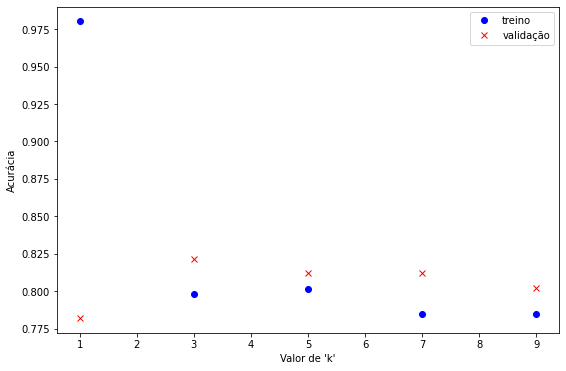

In [405]:
k_list = [1, 3, 5, 7, 9]
# Lista com as acurácias de traino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_2_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_2_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [406]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
1 	 0.9801 	 0.7822
3 	 0.7980 	 0.8218
5 	 0.8013 	 0.8119
7 	 0.7848 	 0.8119
9 	 0.7848 	 0.8020

Melhor 'k': 3 (0.8218 acc.)


In [408]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_2_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

In [409]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[25  0  0  0]
 [ 0 20  1  4]
 [ 0  1 17  7]
 [ 0  4  4 18]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
         bat       0.80      0.80      0.80        25
      beetle       0.77      0.68      0.72        25
        bone       0.62      0.69      0.65        26

    accuracy                           0.79       101
   macro avg       0.80      0.79      0.79       101
weighted avg       0.80      0.79      0.79       101

